<a href="https://colab.research.google.com/github/Hetvi48/AeroCare/blob/main/Outlier_third_notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-Processing

In [ ]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [ ]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

In [ ]:
df_train = pd.read_csv('drive/MyDrive/archive/CMaps/train_FD002.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
df_test = pd.read_csv('drive/MyDrive/archive/CMaps/test_FD002.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
df_test_RUL = pd.read_csv('drive/MyDrive/archive/CMaps/RUL_FD002.txt',sep=r'\s+',header=None,index_col=False,names=['RUL'])

In [ ]:
df_train.head()


engine  cycle  setting_1  setting_2  setting_3  (Fan inlet temperature) (◦R)  (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  (LPT outlet temperature) (◦R)  (Fan inlet Pressure) (psia)  (bypass-duct pressure) (psia)  (HPC outlet pressure) (psia)  (Physical fan speed) (rpm)  (Physical core speed) (rpm)  (Engine pressure ratio(P50/P2)  (HPC outlet Static pressure) (psia)  (Ratio of fuel flow to Ps30) (pps/psia)  (Corrected fan speed) (rpm)  (Corrected core speed) (rpm)  (Bypass Ratio)   (Burner fuel-air ratio)  (Bleed Enthalpy)  (Required fan speed)  (Required fan conversion speed)  (High-pressure turbines Cool air flow)  (Low-pressure turbines Cool air flow)
0       1      1    34.9983     0.8400      100.0                        449.44                         555.32                        1358.61                        1137.23                         5.48                           8.00                        194.64                     2222.65                      8341.91                            1.02                                42.02                                   183.06                      2387.72                       8048.56           9.3461                     0.02               334                  2223                           100.00                                   14.73                                 8.8071
1       1      2    41.9982     0.8408      100.0                        445.00                         549.90                        1353.22                        1125.78                         3.91                           5.71                        138.51                     2211.57                      8303.96                            1.02                                42.20                                   130.42                      2387.66                       8072.30           9.3774                     0.02               330                  2212                           100.00                                   10.41                                 6.2665
2       1      3    24.9988     0.6218       60.0                        462.54                         537.31                        1256.76                        1047.45                         7.05                           9.02                        175.71                     1915.11                      8001.42                            0.94                                36.69                                   164.22                      2028.03                       7864.87          10.8941                     0.02               309                  1915                            84.93                                   14.08                                 8.6723
3       1      4    42.0077     0.8416      100.0                        445.00                         549.51                        1354.03                        1126.38                         3.91                           5.71                        138.46                     2211.58                      8303.96                            1.02                                41.96                                   130.72                      2387.61                       8068.66           9.3528                     0.02               329                  2212                           100.00                                   10.59                                 6.4701
4       1      5    25.0005     0.6203       60.0                        462.54                         537.07                        1257.71                        1047.93                         7.05                           9.03                        175.05                     1915.10                      7993.23                            0.94                                36.89                                   164.31                      2028.00                       7861.23          10.8963                     0.02               309                  1915                  

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   53759 non-null  int64  
 1   cycle                                    53759 non-null  int64  
 2   setting_1                                53759 non-null  float64
 3   setting_2                                53759 non-null  float64
 4   setting_3                                53759 non-null  float64
 5   (Fan inlet temperature) (◦R)             53759 non-null  float64
 6   (LPC outlet temperature) (◦R)            53759 non-null  float64
 7   (HPC outlet temperature) (◦R)            53759 non-null  float64
 8   (LPT outlet temperature) (◦R)            53759 non-null  float64
 9   (Fan inlet Pressure) (psia)              53759 non-null  float64
 10  (bypass-duct pressure) (psia)            53759

In [ ]:
df_train.describe(include='all').T

count         mean         std        min        25%        50%        75%        max
engine                                   53759.0   131.082981   74.463862     1.0000    68.0000   131.0000   195.0000   260.0000
cycle                                    53759.0   109.154746   69.180569     1.0000    52.0000   104.0000   157.0000   378.0000
setting_1                                53759.0    23.998407   14.747376     0.0000    10.0046    25.0013    41.9980    42.0080
setting_2                                53759.0     0.572056    0.310016     0.0000     0.2507     0.7000     0.8400     0.8420
setting_3                                53759.0    94.046020   14.237735    60.0000   100.0000   100.0000   100.0000   100.0000
(Fan inlet temperature) (◦R)             53759.0   472.910207   26.389707   445.0000   445.0000   462.5400   491.1900   518.6700
(LPC outlet temperature) (◦R)            53759.0   579.672399   37.289399   535.5300   549.5700   555.9800   607.3400   644.5200
(HPC outlet temperature) (◦R)            53759.0  1419.971013  105.946341  1243.7300  1352.7600  1369.1800  1499.3700  1612.8800
(LPT outlet temperature) (◦R)            53759.0  1205.442024  119.123428  1023.7700  1123.6550  1138.8900  1306.8500  1439.2300
(Fan inlet Pressure) (psia)              53759.0     8.031986    3.613839     3.9100     3.9100     7.0500    10.5200    14.6200
(bypass-duct pressure) (psia)            53759.0    11.600746    5.431802     5.7100     5.7200     9.0300    15.4900    21.6100
(HPC outlet pressure) (psia)             53759.0   282.606787  146.005306   136.8000   139.9350   194.6600   394.0800   555.8200
(Physical fan speed) (rpm)               53759.0  2228.879188  145.209816  1914.7700  2211.8800  2223.0700  2323.9600  2388.3900
(Physical core speed) (rpm)              53759.0  8525.200837  335.812013  7985.5600  8321.6600  8361.2000  8778.0300  9215.6600
(Engine pressure ratio(P50/P2)           53759.0     1.094962    0.127469     0.9300     1.0200     1.0200     1.2600     1.3000
(HPC outlet Static pressure) (psia)      53759.0    42.985172    3.232372    36.2300    41.9100    42.3900    45.3500    48.5100
(Ratio of fuel flow to Ps30) (pps/psia)  53759.0   266.069034  137.659507   129.1200   131.5200   183.2000   371.2600   523.3700
(Corrected fan speed) (rpm)              53759.0  2334.557253  128.068271  2027.6100  2387.9000  2388.0800  2388.1700  2390.4800
(Corrected core speed) (rpm)             53759.0  8066.597682   84.837950  7848.3600  8062.1400  8082.5400  8127.1950  8268.5000
(Bypass Ratio)                           53759.0     9.329654    0.749335     8.3357     8.6778     9.3109     9.3869    11.0669
(Burner fuel-air ratio)                  53759.0     0.023326    0.004711     0.0200     0.0200     0.0200     0.0300     0.0300
(Bleed Enthalpy)                         53759.0   348.309511   27.754515   303.0000   331.0000   335.0000   369.0000   399.0000
(Required fan speed)                     53759.0  2228.806358  145.327980  1915.0000  2212.0000  2223.0000  2324.0000  2388.0000
(Required fan conversion speed)          53759.0    97.756838    5.364067    84.9300   100.0000   100.0000   100.0000   100.0000
(High-pressure turbines Cool air flow)   53759.0    20.789296    9.869331    10.1800    10.9100    14.8800    28.4700    39.3400
(Low-pressure turbines Cool air flow)    53759.0    12.473423    5.921615     6.0105     6.5463     8.9292    17.0832    23.5901

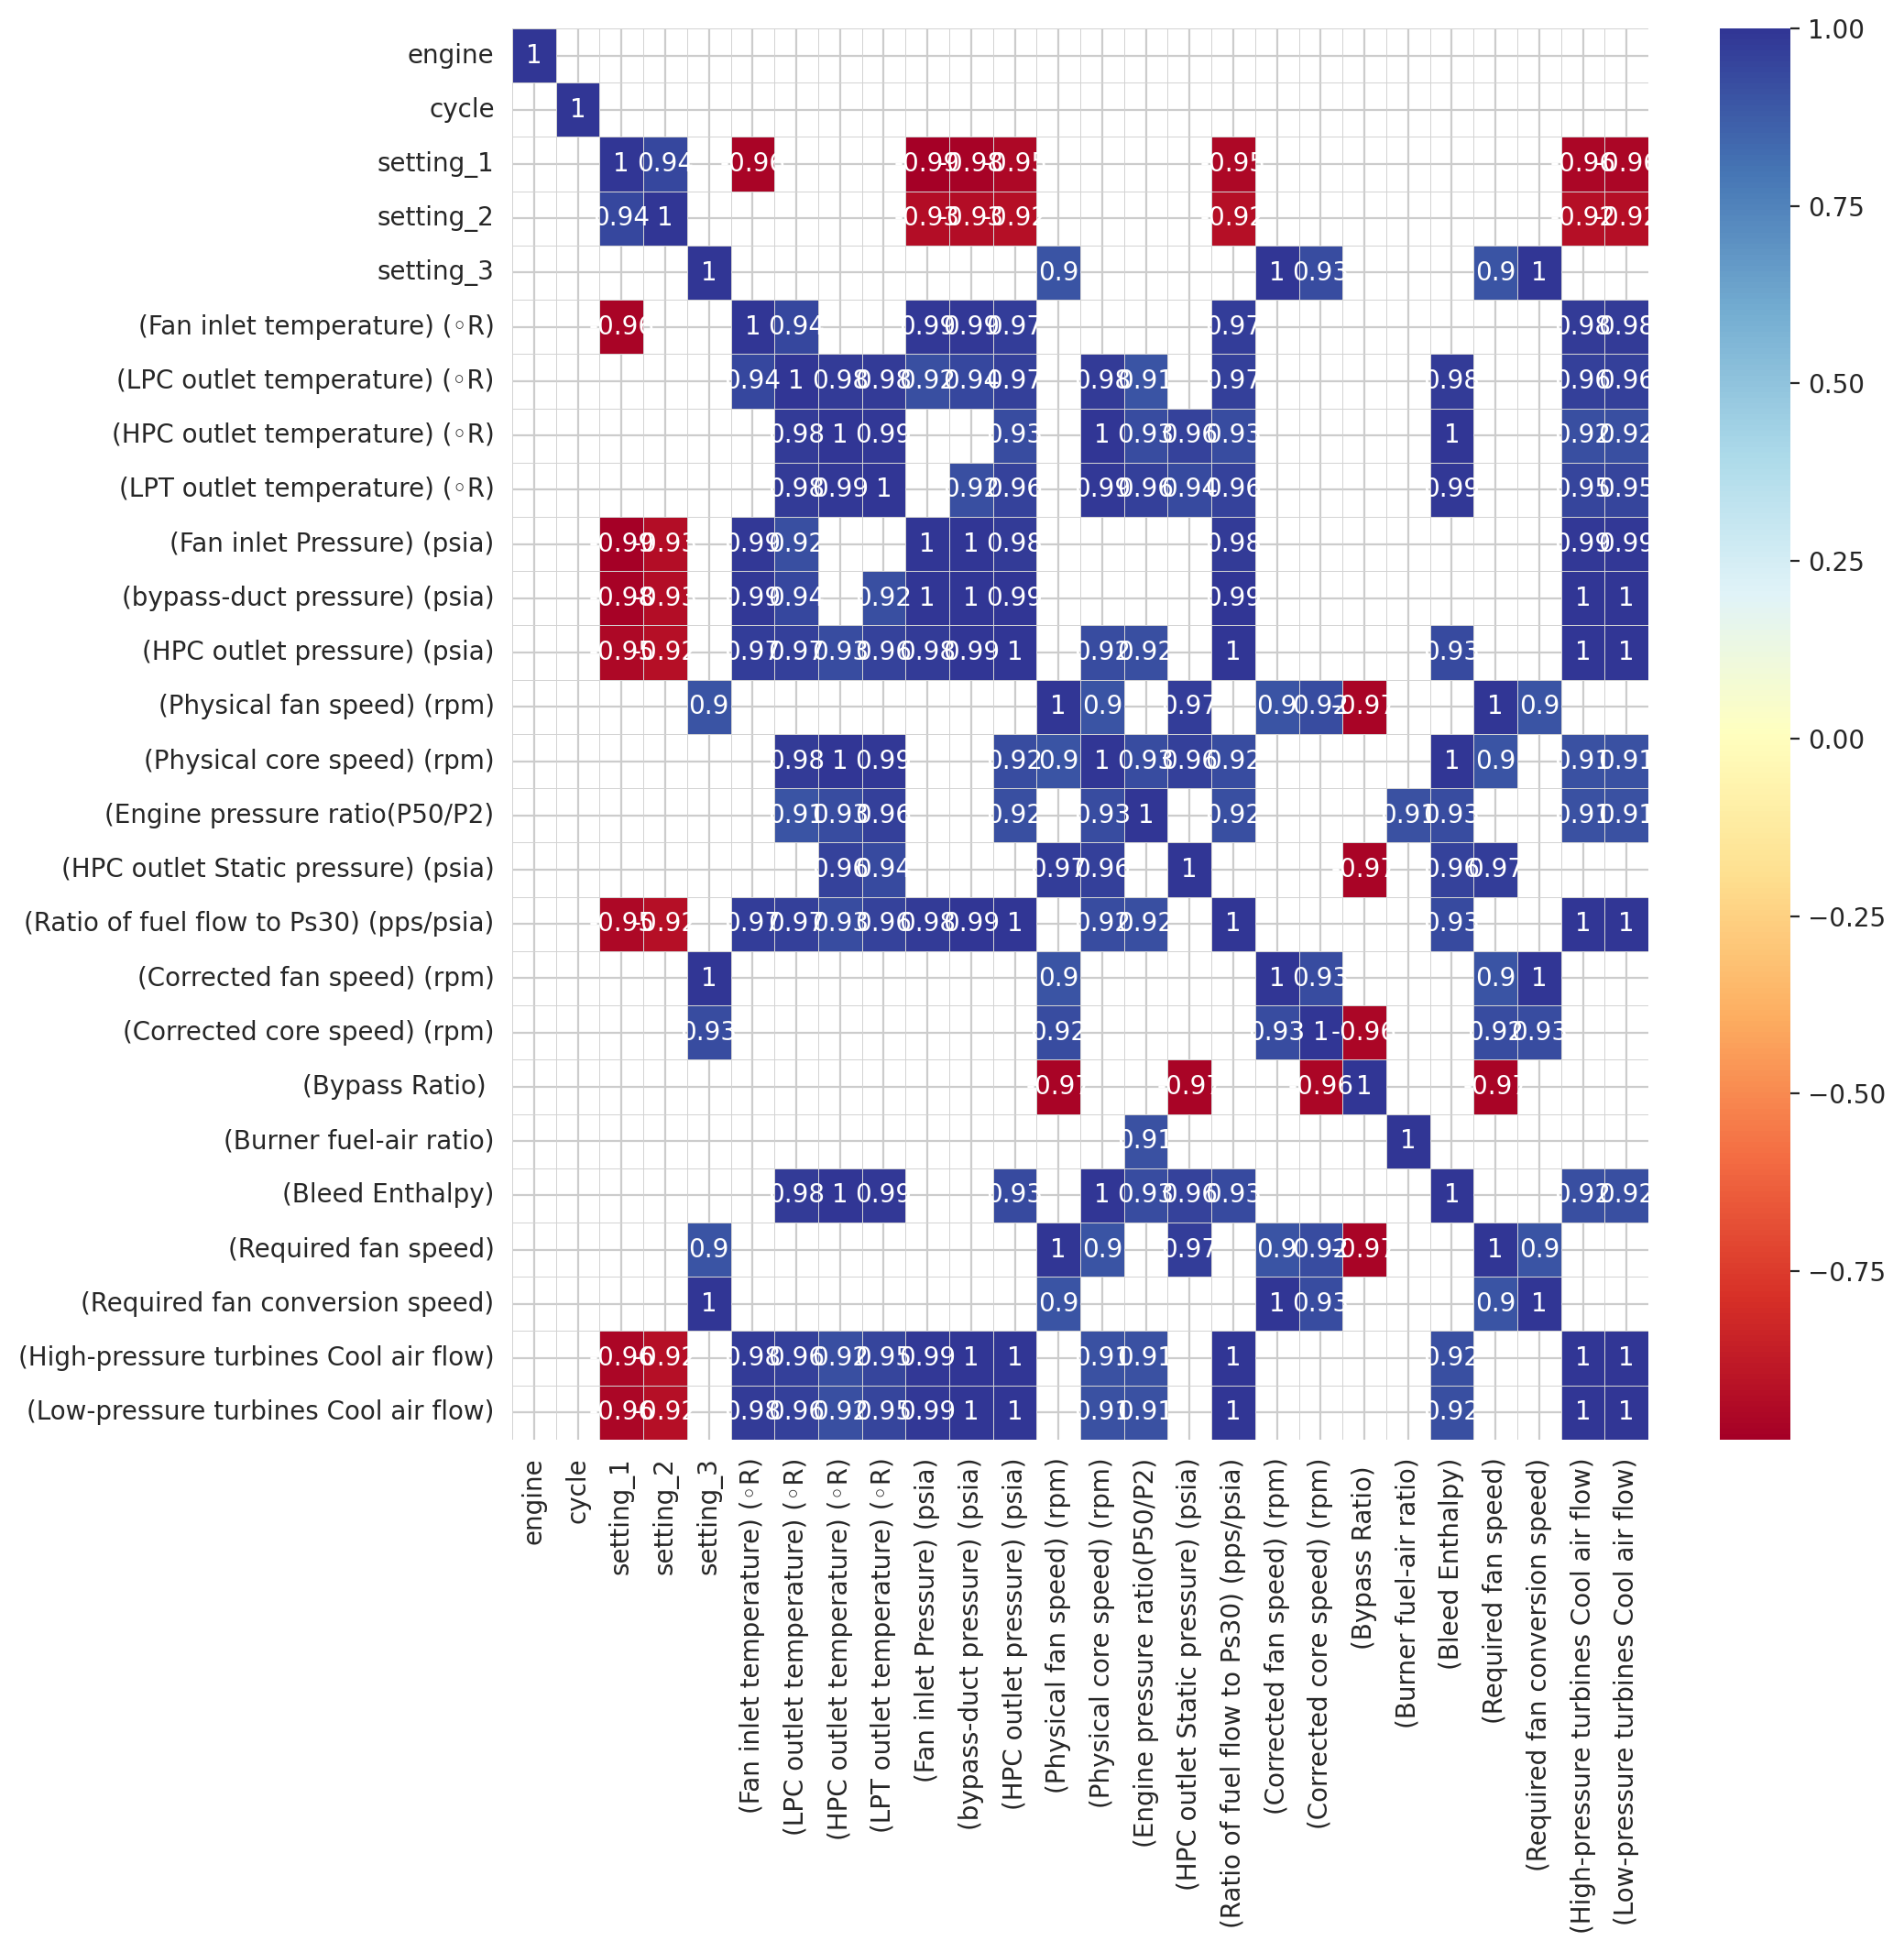

In [ ]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

In [ ]:
# drop the sensors wiith constant values
sens_const_values = []
for feature in list(setting_names + sensor_names):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)
df_test.drop(sens_const_values,axis=1,inplace=True)

[]


In [ ]:
# drop all but one of the highly correlated features
cor_matrix = df_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_features)
df_train.drop(corr_features,axis=1,inplace=True)
df_test.drop(corr_features,axis=1,inplace=True)

['(Fan inlet temperature) (◦R)', '(HPC outlet temperature) (◦R)', '(LPT outlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(bypass-duct pressure) (psia)', '(HPC outlet pressure) (psia)', '(Physical core speed) (rpm)', '(Engine pressure ratio(P50/P2)', '(HPC outlet Static pressure) (psia)', '(Ratio of fuel flow to Ps30) (pps/psia)', '(Corrected fan speed) (rpm)', '(Bypass Ratio) ', '(Bleed Enthalpy)', '(Required fan speed)', '(Required fan conversion speed)', '(High-pressure turbines Cool air flow)', '(Low-pressure turbines Cool air flow)']


In [ ]:
list(df_train)


['engine',
 'cycle',
 'setting_1',
 'setting_2',
 'setting_3',
 '(LPC outlet temperature) (◦R)',
 '(Physical fan speed) (rpm)',
 '(Corrected core speed) (rpm)',
 '(Burner fuel-air ratio)']

In [ ]:
df_train.head()

engine  cycle  setting_1  setting_2  setting_3  (LPC outlet temperature) (◦R)  (Physical fan speed) (rpm)  (Corrected core speed) (rpm)  (Burner fuel-air ratio)
0       1      1    34.9983     0.8400      100.0                         555.32                     2222.65                       8048.56                     0.02
1       1      2    41.9982     0.8408      100.0                         549.90                     2211.57                       8072.30                     0.02
2       1      3    24.9988     0.6218       60.0                         537.31                     1915.11                       7864.87                     0.02
3       1      4    42.0077     0.8416      100.0                         549.51                     2211.58                       8068.66                     0.02
4       1      5    25.0005     0.6203       60.0                         537.07                     1915.10                       7861.23                     0.02

In [ ]:
features = list(df_train.columns)

In [ ]:
for feature in features:
    print(feature + " - " + str(len(df_train[df_train[feature].isna()])))

engine - 0
cycle - 0
setting_1 - 0
setting_2 - 0
setting_3 - 0
(LPC outlet temperature) (◦R) - 0
(Physical fan speed) (rpm) - 0
(Corrected core speed) (rpm) - 0
(Burner fuel-air ratio) - 0


In [ ]:
# define the maximum life of each engine, as this could be used to obtain the RUL at each point in time of the engine's life
df_train_RUL = df_train.groupby(['engine']).agg({'cycle':'max'})
df_train_RUL.rename(columns={'cycle':'life'},inplace=True)
df_train_RUL.head()

life
engine      
1        149
2        269
3        206
4        235
5        154

In [ ]:
df_train=df_train.merge(df_train_RUL,how='left',on=['engine'])

In [ ]:
df_train['RUL']=df_train['life']-df_train['cycle']
df_train.drop(['life'],axis=1,inplace=True)

# the RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL
# this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you are
# to the true value, the more accurate the model will be
df_train['RUL'][df_train['RUL']>125]=125
df_train.head()

engine  cycle  setting_1  setting_2  setting_3  (LPC outlet temperature) (◦R)  (Physical fan speed) (rpm)  (Corrected core speed) (rpm)  (Burner fuel-air ratio)  RUL
0       1      1    34.9983     0.8400      100.0                         555.32                     2222.65                       8048.56                     0.02  125
1       1      2    41.9982     0.8408      100.0                         549.90                     2211.57                       8072.30                     0.02  125
2       1      3    24.9988     0.6218       60.0                         537.31                     1915.11                       7864.87                     0.02  125
3       1      4    42.0077     0.8416      100.0                         549.51                     2211.58                       8068.66                     0.02  125
4       1      5    25.0005     0.6203       60.0                         537.07                     1915.10                       7861.23                     0.02  125

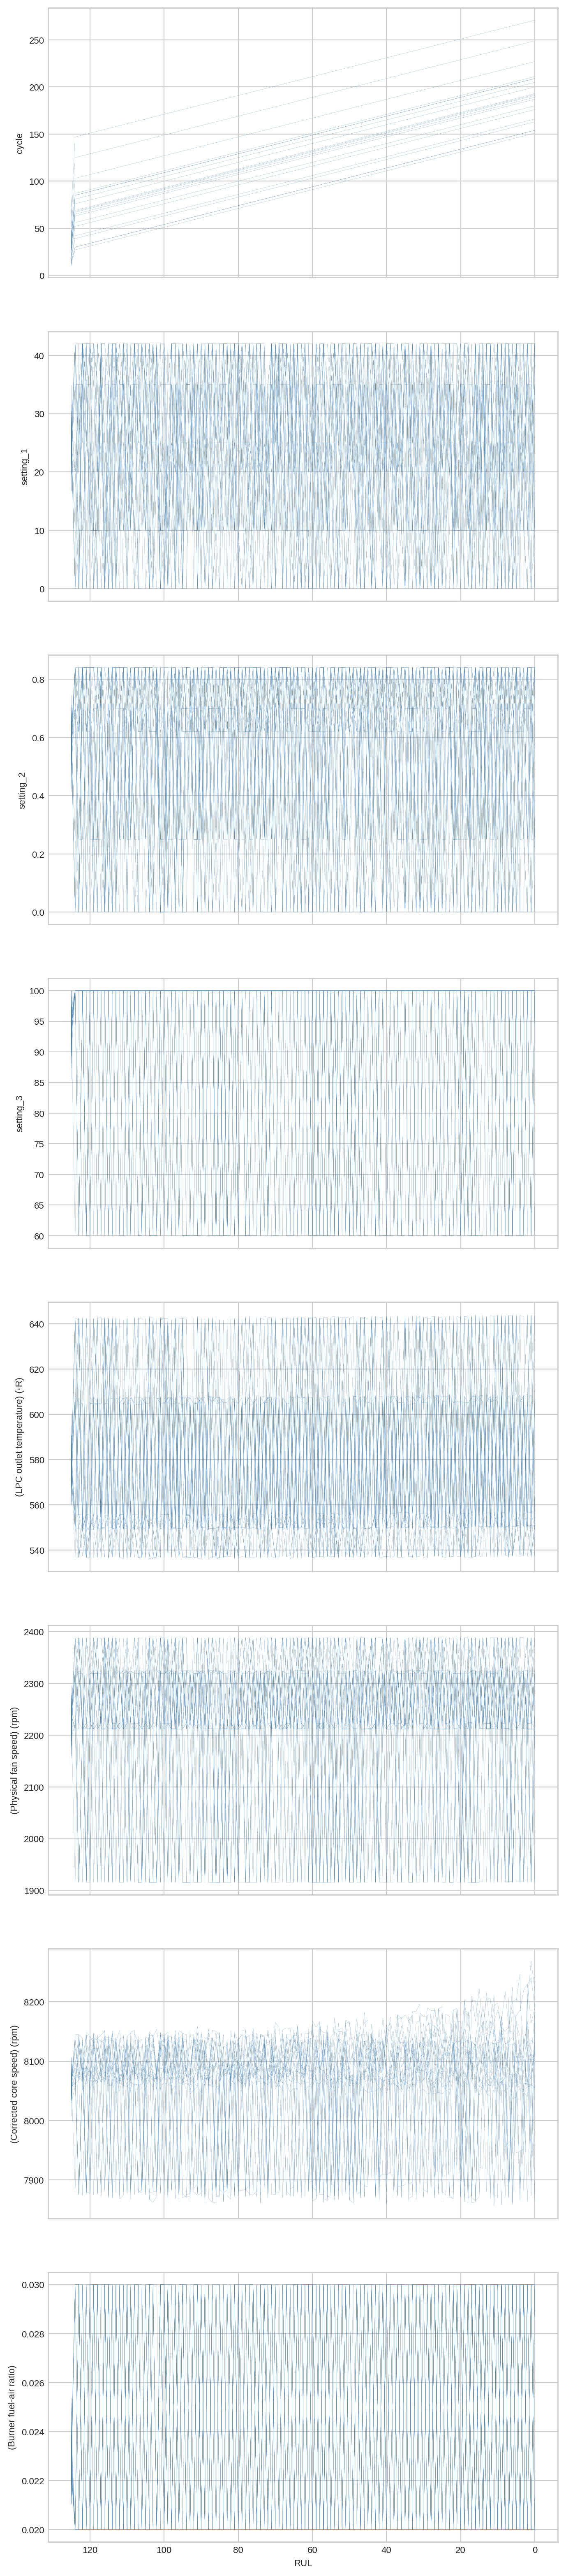

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=8,40
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.1
plot_items = list(df_train.columns)[1:-1]
fig,ax = plt.subplots(len(plot_items),sharex=True)
ax[0].invert_xaxis()

engines = list(df_train['engine'].unique())

for engine in engines[10:30]:
    for i,item in enumerate(plot_items):
        f = sns.lineplot(data=df_train[df_train['engine']==engine],x='RUL',y=item,color='steelblue',ax=ax[i],
        )

In [ ]:
from scipy import signal
def smooth_function(x,window=15,order=3):
    return signal.savgol_filter(x,window,order)

In [ ]:
# awesome bit of code from https://www.kaggle.com/code/adibouayjan/house-price-step-by-step-modeling

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
X = df_train.iloc[:,1:-1]
y = df_train.iloc[:,-1]
backward_regression(X, y)


Selected Features:
['cycle', 'setting_1', 'setting_2', 'setting_3', '(LPC outlet temperature) (◦R)', '(Physical fan speed) (rpm)', '(Corrected core speed) (rpm)', '(Burner fuel-air ratio)']


In [ ]:
Selected_Features

[['cycle',
  'setting_1',
  'setting_2',
  'setting_3',
  '(LPC outlet temperature) (◦R)',
  '(Physical fan speed) (rpm)',
  '(Corrected core speed) (rpm)',
  '(Burner fuel-air ratio)']]

In [ ]:
# X.head()
feature_names = Selected_Features[0]
np.shape(X)

(53759, 8)

In [ ]:
len(feature_names)

8

In [ ]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
df_test_cycle = df_test.groupby(['engine']).agg({'cycle':'max'})
df_test_cycle.rename(columns={'cycle':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['engine'])
df_test_max = df_test_max[(df_test_max['cycle']==df_test_max['life'])]
df_test_max.drop(['life'],axis=1,inplace=True)
# df_test_max

In [ ]:
X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [ ]:
X_train.head()

cycle  setting_1  setting_2  setting_3  (LPC outlet temperature) (◦R)  (Physical fan speed) (rpm)  (Corrected core speed) (rpm)  (Burner fuel-air ratio)
0      1    34.9983     0.8400      100.0                         555.32                     2222.65                       8048.56                     0.02
1      2    41.9982     0.8408      100.0                         549.90                     2211.57                       8072.30                     0.02
2      3    24.9988     0.6218       60.0                         537.31                     1915.11                       7864.87                     0.02
3      4    42.0077     0.8416      100.0                         549.51                     2211.58                       8068.66                     0.02
4      5    25.0005     0.6203       60.0                         537.07                     1915.10                       7861.23                     0.02

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# KNN

In [ ]:
# %%time
# from sklearn.neighbors import KNeighborsRegressor
# start = time.time()
# model = KNeighborsRegressor(n_neighbors=9).fit(X_train,y_train)
# end_train = time.time()
# y_predictions = model.predict(X_test) # These are the predictions from the test data.
# end_predict = time.time()

# # Calculate RMSE by taking the square root of mean_squared_error
# mse = mean_squared_error(y_test, y_predictions)
# rmse = np.sqrt(mse)

# model_performance.loc['kNN'] = [model.score(X_test,y_test),
#                                    rmse,
#                                    end_train-start,
#                                    end_predict-end_train,
#                                    end_predict-start]

# print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
# print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=5,5
# plt.rcParams['font.family'] = 'Calibri'
# plt.rcParams['lines.linewidth'] = 3
# plt.rcParams['axes.labelsize']=20
# plt.rcParams['xtick.labelsize']=16
# plt.rcParams['ytick.labelsize']=16
# plt.rcParams['legend.fontsize']=16

# fig,ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# g = sns.scatterplot(x=y_test,
#                 y=y_predictions,
#                 s=100,
#                 alpha=0.6,
#                 linewidth=1,
#                 edgecolor='black',
#                 ax=ax)
# f = sns.lineplot(x=[min(y_test),max(y_test)],
#              y=[min(y_test),max(y_test)],
#              linewidth=4,
#              color='gray',
#              ax=ax)

# plt.annotate(text=('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)) +'\n' +
#                   'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions))),
#              xy=(0,100),
#              size='medium')

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()

In [ ]:
# pip install -U scikit-learn


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import mean_squared_error

# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize'] = (5, 5)
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['lines.linewidth'] = 3
# plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['xtick.labelsize'] = 16
# plt.rcParams['ytick.labelsize'] = 16
# plt.rcParams['legend.fontsize'] = 16

# fig, ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')

# g = sns.scatterplot(
#     x=y_test,
#     y=y_predictions,
#     s=100,
#     alpha=0.6,
#     linewidth=1,
#     edgecolor='black',
#     ax=ax
# )

# sns.lineplot(
#     x=[min(y_test), max(y_test)],
#     y=[min(y_test), max(y_test)],
#     linewidth=4,
#     color='gray',
#     ax=ax
# )

# rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
# x_pos = 0.05 * max(y_test)
# y_pos = 0.9 * max(y_predictions)

# plt.annotate(
#     text=(
#         'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
#         'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
#     ),
#     xy=(x_pos, y_pos),
#     size='medium',
#     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
# )

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()
# plt.show()


In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=20,5

# fig,ax = plt.subplots()
# plt.ylabel('RUL')
# plt.xlabel('Engine nr')

# g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_test,
#                 color='gray',
#                 label = 'actual',
#                 ax=ax)

# f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_predictions,
#                 color='steelblue',
#                 label = 'predictions',
#                 ax=ax)
# ax.legend()

# SVM

In [ ]:
# %%time
# from sklearn.svm import SVR
# start = time.time()
# model = SVR(kernel="rbf", C=100, gamma=0.5, epsilon=0.01).fit(X_train,y_train)
# end_train = time.time()
# y_predictions = model.predict(X_test) # These are the predictions from the test data.
# end_predict = time.time()

# # Calculate RMSE
# mse = mean_squared_error(y_test, y_predictions)
# rmse = np.sqrt(mse)

# model_performance.loc['SVM'] = [model.score(X_test,y_test),
#                                    rmse,
#                                    end_train-start,
#                                    end_predict-end_train,
#                                    end_predict-start]

# print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
# print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize'] = (5, 5)
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['lines.linewidth'] = 3
# plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['xtick.labelsize'] = 16
# plt.rcParams['ytick.labelsize'] = 16
# plt.rcParams['legend.fontsize'] = 16

# fig,ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# g = sns.scatterplot(x=y_test,
#                 y=y_predictions,
#                 s=100,
#                 alpha=0.6,
#                 linewidth=1,
#                 edgecolor='black',
#                 ax=ax)
# f = sns.lineplot(x=[min(y_test),max(y_test)],
#              y=[min(y_test),max(y_test)],
#              linewidth=4,
#              color='gray',
#              ax=ax)

# rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
# x_pos = 0.05 * max(y_test)
# y_pos = 0.9 * max(y_predictions)

# plt.annotate(
#     text=(
#         'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
#         'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
#     ),
#     xy=(x_pos, y_pos),
#     size='medium',
#     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
# )

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=20,5

# fig,ax = plt.subplots()
# plt.ylabel('RUL')
# plt.xlabel('Engine nr')

# g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_test,
#                 color='gray',
#                 label = 'actual',
#                 ax=ax)

# f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_predictions,
#                 color='steelblue',
#                 label = 'predictions',
#                 ax=ax)
# ax.legend()

# Random Forest

In [ ]:
# type(X_train)

In [ ]:
# %%time
# from sklearn.ensemble import RandomForestRegressor
# start = time.time()
# model = RandomForestRegressor(n_jobs=-1,
#                               n_estimators=500,
#                               min_samples_leaf=1,
#                               max_features='sqrt',
#                              ).fit(X_train,y_train)
# end_train = time.time()
# y_predictions = model.predict(X_test) # These are the predictions from the test data.
# end_predict = time.time()

# # Calculate RMSE
# mse = mean_squared_error(y_test, y_predictions)
# rmse = np.sqrt(mse)

# model_performance.loc['Random Forest'] = [model.score(X_test,y_test),
#                                    rmse,
#                                    end_train-start,
#                                    end_predict-end_train,
#                                    end_predict-start]

# print('R-squared error: '+ "{:.2%}".format(model.score(X_test,y_test)))
# print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=5,5

# fig,ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# g = sns.scatterplot(x=y_test,
#                 y=y_predictions,
#                 s=100,
#                 alpha=0.6,
#                 linewidth=1,
#                 edgecolor='black',
#                 ax=ax)
# f = sns.lineplot(x=[min(y_test),max(y_test)],
#              y=[min(y_test),max(y_test)],
#              linewidth=4,
#              color='gray',
#              ax=ax)

# rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
# x_pos = 0.05 * max(y_test)
# y_pos = 0.9 * max(y_predictions)

# plt.annotate(
#     text=(
#         'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
#         'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
#     ),
#     xy=(x_pos, y_pos),
#     size='medium',
#     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
# )

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=20,5

# fig,ax = plt.subplots()
# plt.ylabel('RUL')
# plt.xlabel('Engine nr')

# g = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_test,
#                 color='gray',
#                 label = 'actual',
#                 ax=ax)

# f = sns.lineplot(x = np.arange(0,len(df_train['engine'].unique())),
#                 y=y_predictions,
#                 color='steelblue',
#                 label = 'predictions',
#                 ax=ax)
# ax.legend()

# LSTM

In [ ]:
# !pip install tensorflow keras --upgrade


In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# import sklearn

In [ ]:
# model = keras.Sequential()
# model.add(LSTM(100,
#                 return_sequences=True,
#                input_shape=(1,X_train.shape[1])
#               ))
# model.add(BatchNormalization())
# model.add(LSTM(50,
#                 return_sequences=True,
#                activation='tanh'
#               ))
# model.add(Dropout(0.5))
# model.add(LSTM(10,
#                return_sequences=True,
#                activation='tanh',
#               ))
# model.add(Dropout(0.5))
# model.add(Dense(100,
#                activation='relu',
#               ))
# model.add(Dense(1))

In [ ]:
# initial_learning_rate = 0.1
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=100000,
#     decay_rate=0.96,
#     staircase=True)

In [ ]:
# model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
# model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        43,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 100)         │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 10)          │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 100)         │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 1)           │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,841 (304.07 KB)

 Trainable params: 77,641 (303.29 KB)

 Non-trainable params: 200 (800.00 B)

In [ ]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=4, min_lr=1e-7, verbose=1)

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.1)

# #The LSTM input layer must be 3D.
# #The meaning of the 3 input dimensions are: samples, time steps, and features.
# #reshape input data
# X_train_reshaped = X_train_s.reshape(X_train_s.shape[0], 1, X_train_s.shape[1])
# X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
# X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# %%time

# start = time.time()
# history = model.fit(x=X_train_reshaped,y=y_train_s,
#                     validation_data = (X_val_reshaped,y_val),
#                     epochs = 20,
#                     # shuffle = True,
#                     batch_size = 500,
#                     callbacks=[reduce_lr]
#                    )
# end_train = time.time()
# y_predictions = model.predict(X_test_reshaped) # These are the predictions from the test data.
# end_predict = time.time()
# y_predictions = y_predictions[:,0][:,0]

# # Calculate RMSE
# mse = mean_squared_error(y_test, y_predictions)
# rmse = np.sqrt(mse)

# model_performance.loc['LSTM'] = [sklearn.metrics.r2_score(y_test, y_predictions),
#                                    rmse,
#                                    end_train-start,
#                                    end_predict-end_train,
#                                    end_predict-start]

# print('R-squared error: '+ "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions)))
# print('Root Mean Squared Error: '+ "{:.2f}".format(rmse))

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 9138.8105 - val_loss: 7786.8237 - learning_rate: 0.0010
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 6207.4756 - val_loss: 3295.6050 - learning_rate: 0.0010
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2877.7002 - val_loss: 2432.9231 - learning_rate: 0.0010
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1757.0225 - val_loss: 2789.2856 - learning_rate: 0.0010
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1422.4283 - val_loss: 1626.3534 - learning_rate: 0.0010
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1325.2219 - val_loss: 1022.4448 - learning_rate: 0.0010
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1279.3190 - val_loss: 788.4345 - learning_rate: 0.0010
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1247.6935 - val_loss: 743.8331 - learning_rate: 0.0010
Epoch 9/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1191.8669 - val_loss: 7

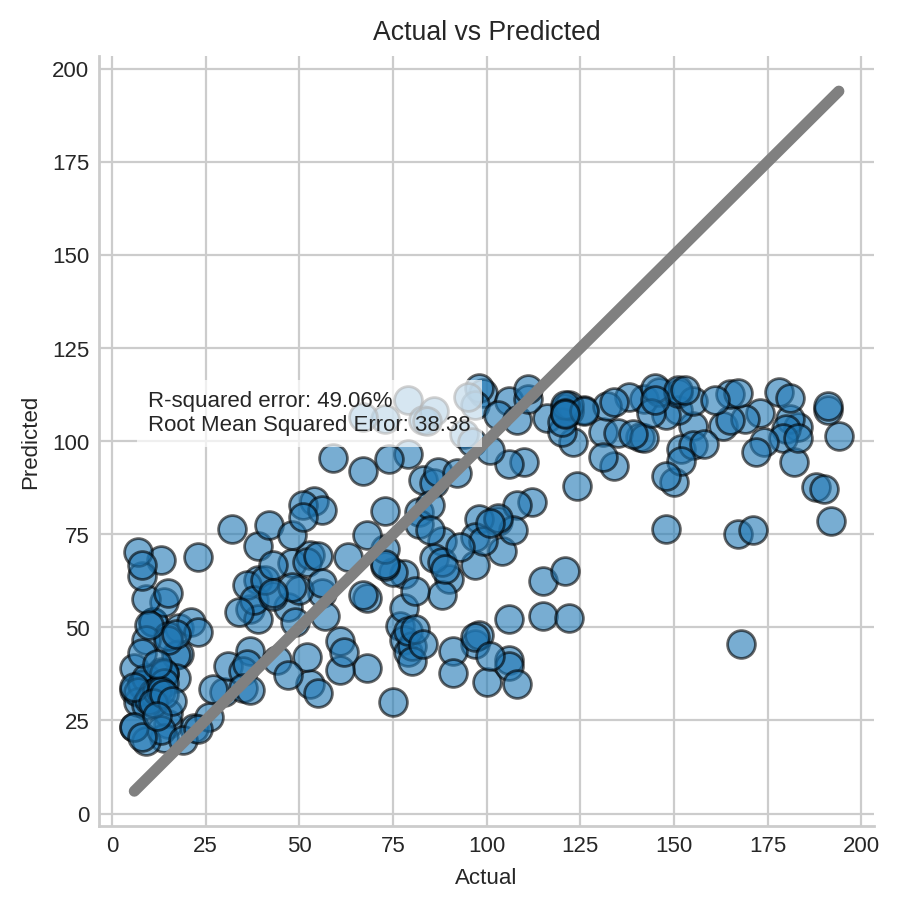

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize'] = (5, 5)

# fig,ax = plt.subplots()
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# g = sns.scatterplot(x=y_test,
#                 y=y_predictions,
#                 s=100,
#                 alpha=0.6,
#                 linewidth=1,
#                 edgecolor='black',
#                 ax=ax)
# f = sns.lineplot(x=[min(y_test),max(y_test)],
#              y=[min(y_test),max(y_test)],
#              linewidth=4,
#              color='gray',
#              ax=ax)

# rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
# r2 = sklearn.metrics.r2_score(y_test, y_predictions) # Calculate R2 using sklearn.metrics.r2_score
# x_pos = 0.05 * max(y_test)
# y_pos = 0.9 * max(y_predictions)

# plt.annotate(
#     text=(
#         'R-squared error: ' + "{:.2%}".format(r2) + '\n' + # Use the calculated R2
#         'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
#     ),
#     xy=(x_pos, y_pos),
#     size='medium',
#     bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
# )

# xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
# g.set_xticklabels(xlabels)
# ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)
# sns.despine()

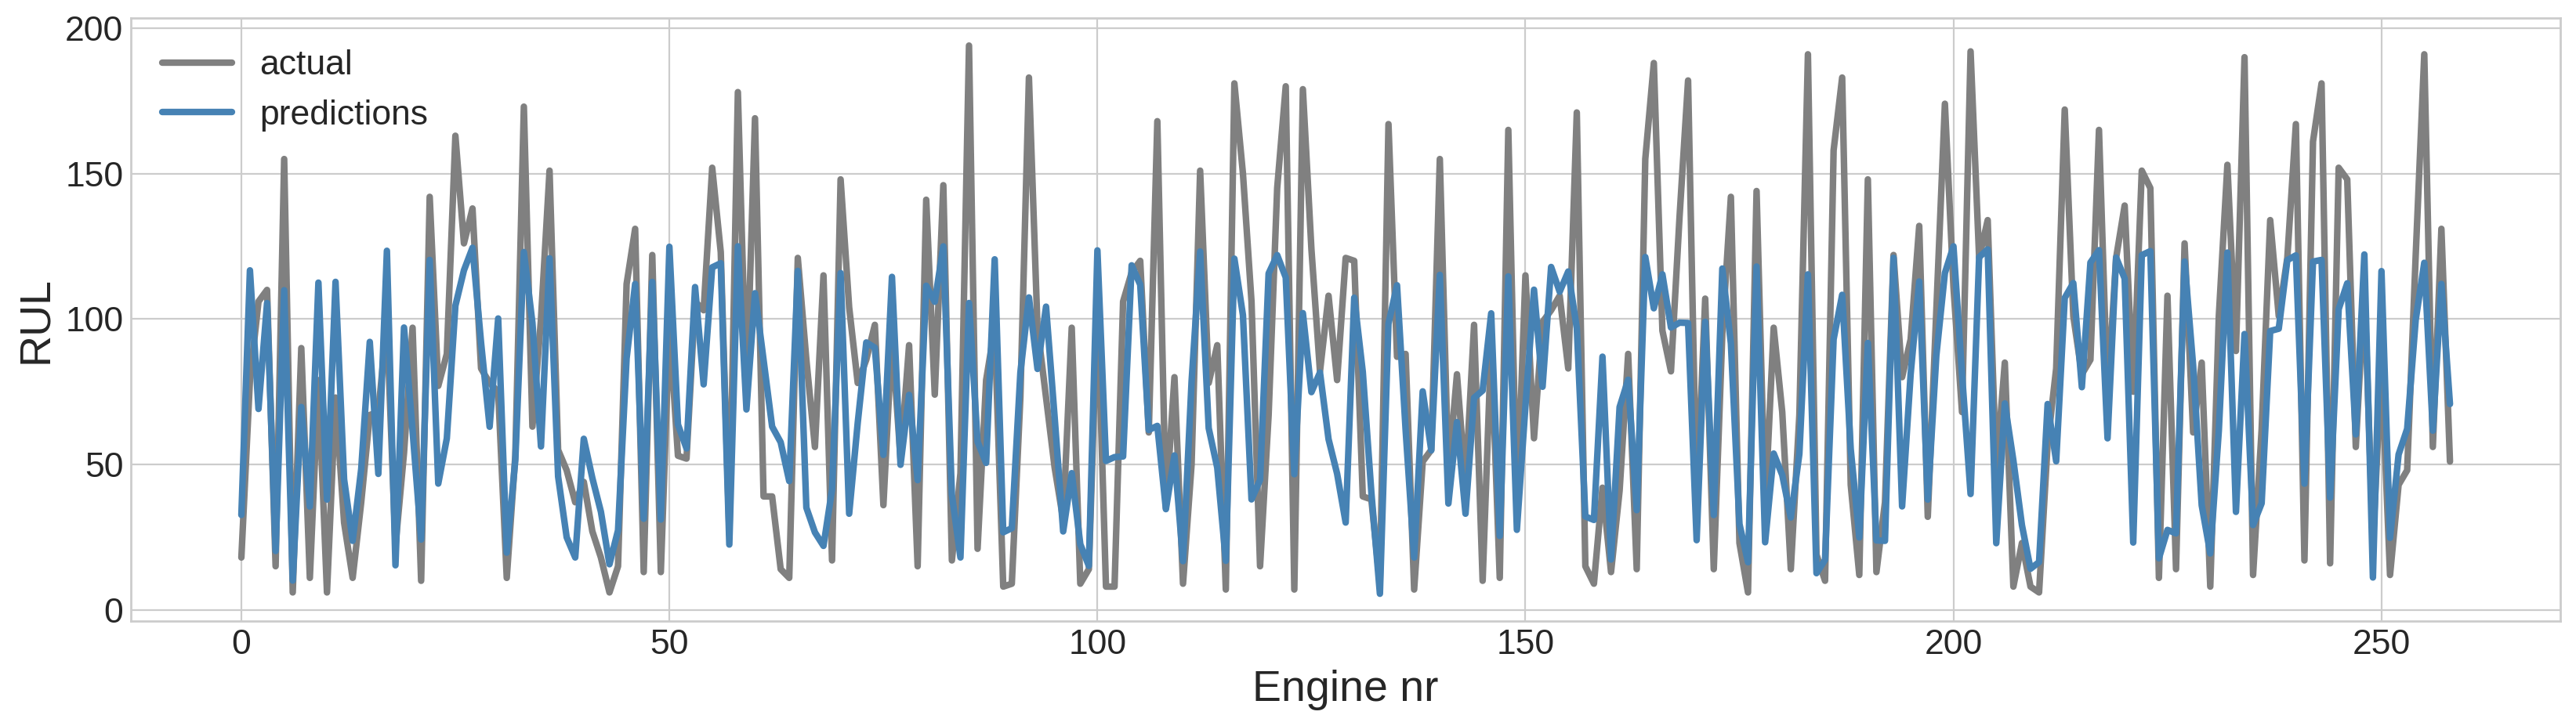

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=20,5

# fig,ax = plt.subplots()
# plt.ylabel('RUL')
# plt.xlabel('Engine nr')

# g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
#                 y=y_test,
#                 color='gray',
#                 label = 'actual',
#                 ax=ax)

# f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
#                 y=y_predictions,
#                 color='steelblue',
#                 label = 'predictions',
#                 ax=ax)
# ax.legend()

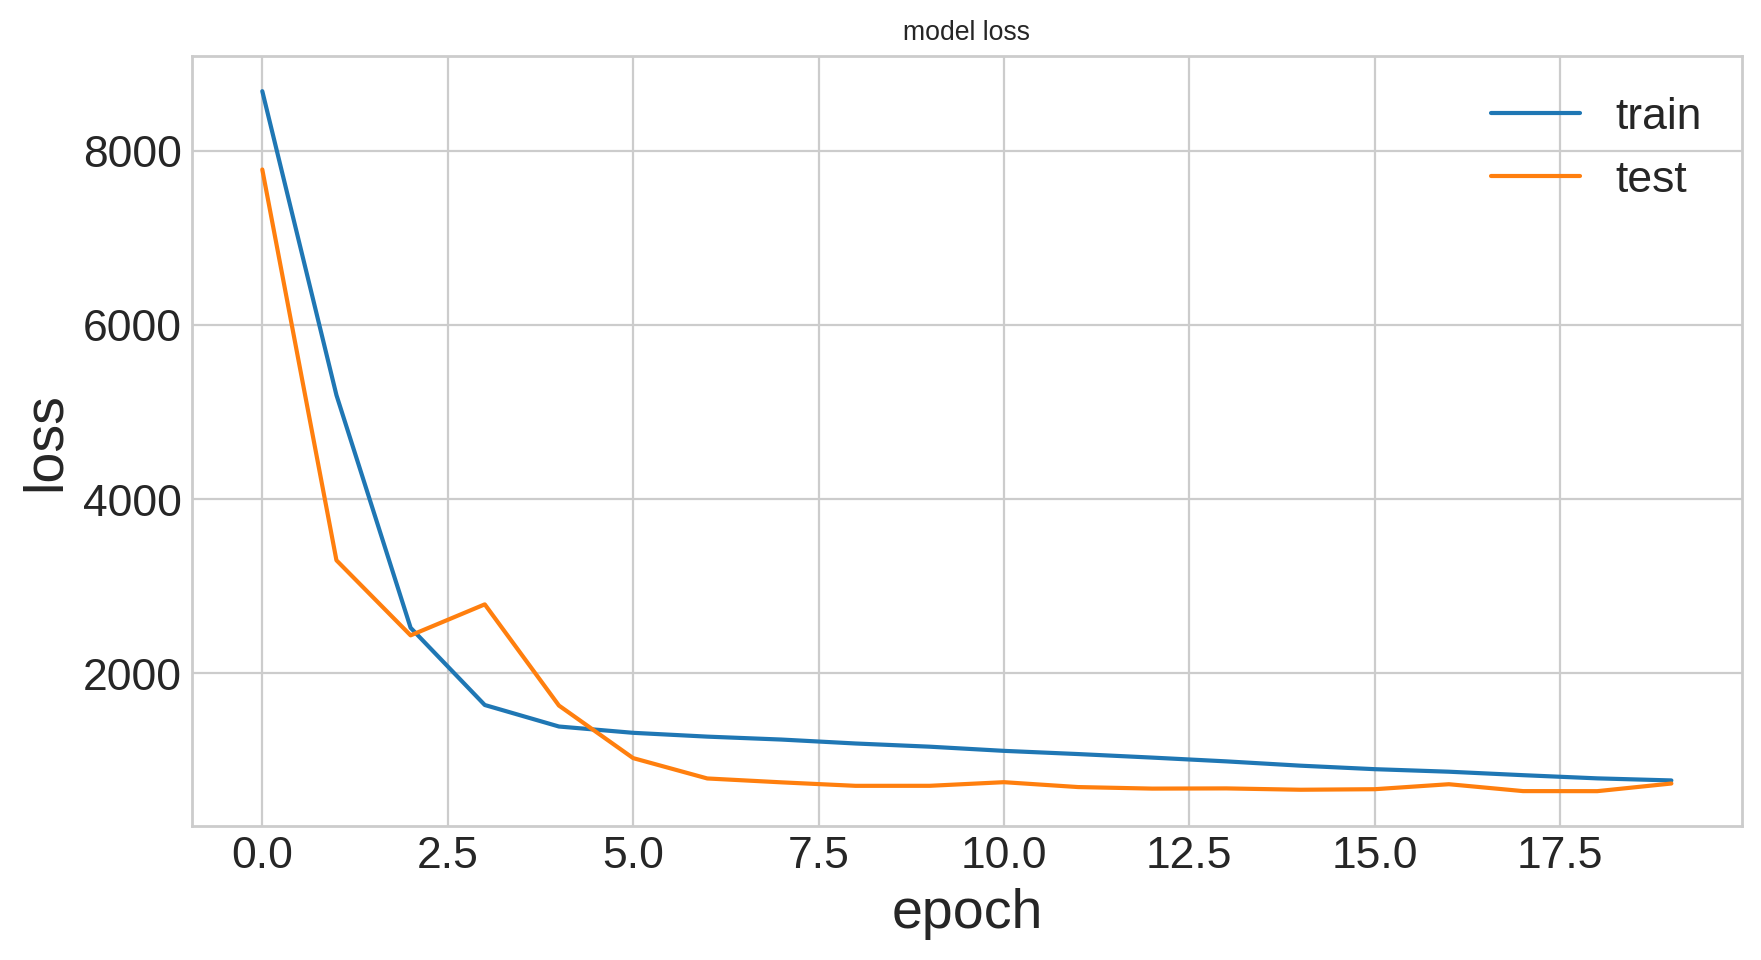

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams['figure.figsize']=5,5
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.size'] = 8
# plt.rcParams['lines.linewidth'] = 1.5
# plt.figure(figsize=(10,5))
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'])
# plt.show()


In [ ]:
# model_performance.style.background_gradient(cmap='RdYlBu_r').format({'R2': '{:.2%}',
#                                                                      'RMSE': '{:.2f}',
#                                                                      'time to train':'{:.3f}',
#                                                                      'time to predict':'{:.3f}',
#                                                                      'total time':'{:.3f}',
#                                                                      })

# Best Model

########

# Outlier detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest

# ========================================
# OUTLIER DETECTION FOR NUMPY ARRAYS
# ========================================

def remove_outliers_numpy(X_train, y_train, method='iqr', column_names=None):
    """
    Remove outliers from numpy arrays

    Parameters:
    -----------
    X_train : numpy.ndarray
        Training features array
    y_train : numpy.ndarray
        Training target array
    method : str
        'iqr', 'zscore', or 'isolation'
    column_names : list, optional
        Feature names for better visualization

    Returns:
    --------
    X_train_clean : numpy.ndarray
        Clean training features
    y_train_clean : numpy.ndarray
        Clean training targets
    """

    print("="*60)
    print("OUTLIER DETECTION AND REMOVAL")
    print("="*60)
    print(f"Original X_train shape: {X_train.shape}")
    print(f"Original y_train shape: {y_train.shape}")

    # Create column names if not provided
    if column_names is None:
        column_names = [f'feature_{i}' for i in range(X_train.shape[1])]

    # Convert to DataFrame for easier manipulation
    df = pd.DataFrame(X_train, columns=column_names)

    # Visualize before outlier removal
    print("\n" + "="*60)
    print("VISUALIZING DATA BEFORE OUTLIER REMOVAL")
    print("="*60)
    visualize_boxplots(df, column_names, "Before Outlier Removal")

    # Detect outliers based on method
    print("\n" + "="*60)
    print(f"DETECTING OUTLIERS USING {method.upper()} METHOD")
    print("="*60)

    if method == 'iqr':
        outlier_indices = detect_outliers_iqr(df, column_names)
    elif method == 'zscore':
        outlier_indices = detect_outliers_zscore(df, column_names, threshold=3)
    elif method == 'isolation':
        outlier_indices = detect_outliers_isolation_forest(df, column_names)
    else:
        raise ValueError("Method must be 'iqr', 'zscore', or 'isolation'")

    # Create mask for clean data (inliers)
    mask = np.ones(len(X_train), dtype=bool)
    mask[outlier_indices] = False

    # Remove outliers
    X_train_clean = X_train[mask]
    y_train_clean = y_train[mask]

    # Statistics
    print("\n" + "="*60)
    print("OUTLIER REMOVAL SUMMARY")
    print("="*60)
    print(f"Total rows in original data: {len(X_train)}")
    print(f"Outliers detected and removed: {len(outlier_indices)}")
    print(f"Clean data rows: {len(X_train_clean)}")
    print(f"Percentage of data retained: {(len(X_train_clean)/len(X_train))*100:.2f}%")

    # Visualize after outlier removal
    df_clean = pd.DataFrame(X_train_clean, columns=column_names)
    print("\n" + "="*60)
    print("VISUALIZING DATA AFTER OUTLIER REMOVAL")
    print("="*60)
    visualize_boxplots(df_clean, column_names, "After Outlier Removal")

    # Compare statistics
    print("\n" + "="*60)
    print("STATISTICS COMPARISON")
    print("="*60)
    compare_statistics(df, df_clean, column_names)

    return X_train_clean, y_train_clean


def detect_outliers_iqr(df, columns):
    """Detect outliers using IQR method"""
    outlier_indices = []

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_list = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices.extend(outlier_list)

        print(f"\n{col}:")
        print(f"  Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
        print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"  Outliers: {len(outlier_list)}")

    return list(set(outlier_indices))


def detect_outliers_zscore(df, columns, threshold=3):
    """Detect outliers using Z-score method"""
    outlier_indices = []

    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outlier_list = np.where(z_scores > threshold)[0].tolist()
        outlier_indices.extend(outlier_list)

        print(f"\n{col}:")
        print(f"  Mean={df[col].mean():.2f}, Std={df[col].std():.2f}")
        print(f"  Z-score threshold: {threshold}")
        print(f"  Outliers: {len(outlier_list)}")

    return list(set(outlier_indices))


def detect_outliers_isolation_forest(df, columns, contamination=0.05):
    """Detect outliers using Isolation Forest"""
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outlier_labels = iso_forest.fit_predict(df[columns])
    outlier_indices = np.where(outlier_labels == -1)[0].tolist()

    print(f"\nIsolation Forest (contamination={contamination}):")
    print(f"  Outliers detected: {len(outlier_indices)}")

    return outlier_indices


def visualize_boxplots(df, columns, title):
    """Create boxplots for visualization"""
    n_cols = len(columns)
    n_rows = (n_cols + 3) // 4  # 4 plots per row

    fig, axes = plt.subplots(n_rows, min(4, n_cols), figsize=(16, 4*n_rows))

    if n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if n_cols > 1 else [axes]
    else:
        axes = axes.flatten()

    for idx, col in enumerate(columns):
        axes[idx].boxplot(df[col].dropna(), vert=True)
        axes[idx].set_title(col, fontsize=10)
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, alpha=0.3)

    # Hide extra subplots
    for idx in range(len(columns), len(axes)):
        axes[idx].axis('off')

    plt.suptitle(title, fontsize=14, y=1.00)
    plt.tight_layout()
    plt.show()


def compare_statistics(df_original, df_clean, columns):
    """Compare statistics before and after outlier removal"""
    print(f"\n{'Column':<20} {'Metric':<10} {'Original':<12} {'Clean':<12} {'Change':<10}")
    print("-" * 70)

    for col in columns:
        # Mean
        orig_mean = df_original[col].mean()
        clean_mean = df_clean[col].mean()
        change = ((clean_mean - orig_mean) / orig_mean * 100) if orig_mean != 0 else 0
        print(f"{col:<20} {'Mean':<10} {orig_mean:<12.2f} {clean_mean:<12.2f} {change:>+9.2f}%")

        # Std
        orig_std = df_original[col].std()
        clean_std = df_clean[col].std()
        change = ((clean_std - orig_std) / orig_std * 100) if orig_std != 0 else 0
        print(f"{'':<20} {'Std':<10} {orig_std:<12.2f} {clean_std:<12.2f} {change:>+9.2f}%")

        # Min/Max
        print(f"{'':<20} {'Min':<10} {df_original[col].min():<12.2f} {df_clean[col].min():<12.2f}")
        print(f"{'':<20} {'Max':<10} {df_original[col].max():<12.2f} {df_clean[col].max():<12.2f}")
        print()


# ========================================
# USAGE - COPY THIS TO YOUR NOTEBOOK
# ========================================

"""
# STEP 1: Remove outliers from your training data
# Choose method: 'iqr' (recommended), 'zscore', or 'isolation'

X_train_clean, y_train_clean = remove_outliers_numpy(
    X_train=X_train,
    y_train=y_train,
    method='iqr',  # Options: 'iqr', 'zscore', 'isolation'
    column_names=None  # Provide your actual column names if you have them
)

# STEP 2: Now use the clean data for model training
# Your X_train_clean and y_train_clean are ready!

# Example:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train_clean, y_train_clean)
# predictions = model.predict(X_test)
"""

# ========================================
# ALTERNATIVE: If you want only specific method
# ========================================

def remove_outliers_iqr_only(X_train, y_train):
    """Quick IQR-based outlier removal"""
    df = pd.DataFrame(X_train)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Create mask for rows without outliers
    mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

    X_train_clean = X_train[mask]
    y_train_clean = y_train[mask]

    print(f"Original size: {len(X_train)}")
    print(f"Removed: {len(X_train) - len(X_train_clean)}")
    print(f"Clean size: {len(X_train_clean)}")

    return X_train_clean, y_train_clean


def remove_outliers_zscore_only(X_train, y_train, threshold=3):
    """Quick Z-score based outlier removal"""
    z_scores = np.abs(stats.zscore(X_train))
    mask = (z_scores < threshold).all(axis=1)

    X_train_clean = X_train[mask]
    y_train_clean = y_train[mask]

    print(f"Original size: {len(X_train)}")
    print(f"Removed: {len(X_train) - len(X_train_clean)}")
    print(f"Clean size: {len(X_train_clean)}")

    return X_train_clean, y_train_clean

OUTLIER DETECTION AND REMOVAL
Original X_train shape: (53759, 8)
Original y_train shape: (53759,)

VISUALIZING DATA BEFORE OUTLIER REMOVAL


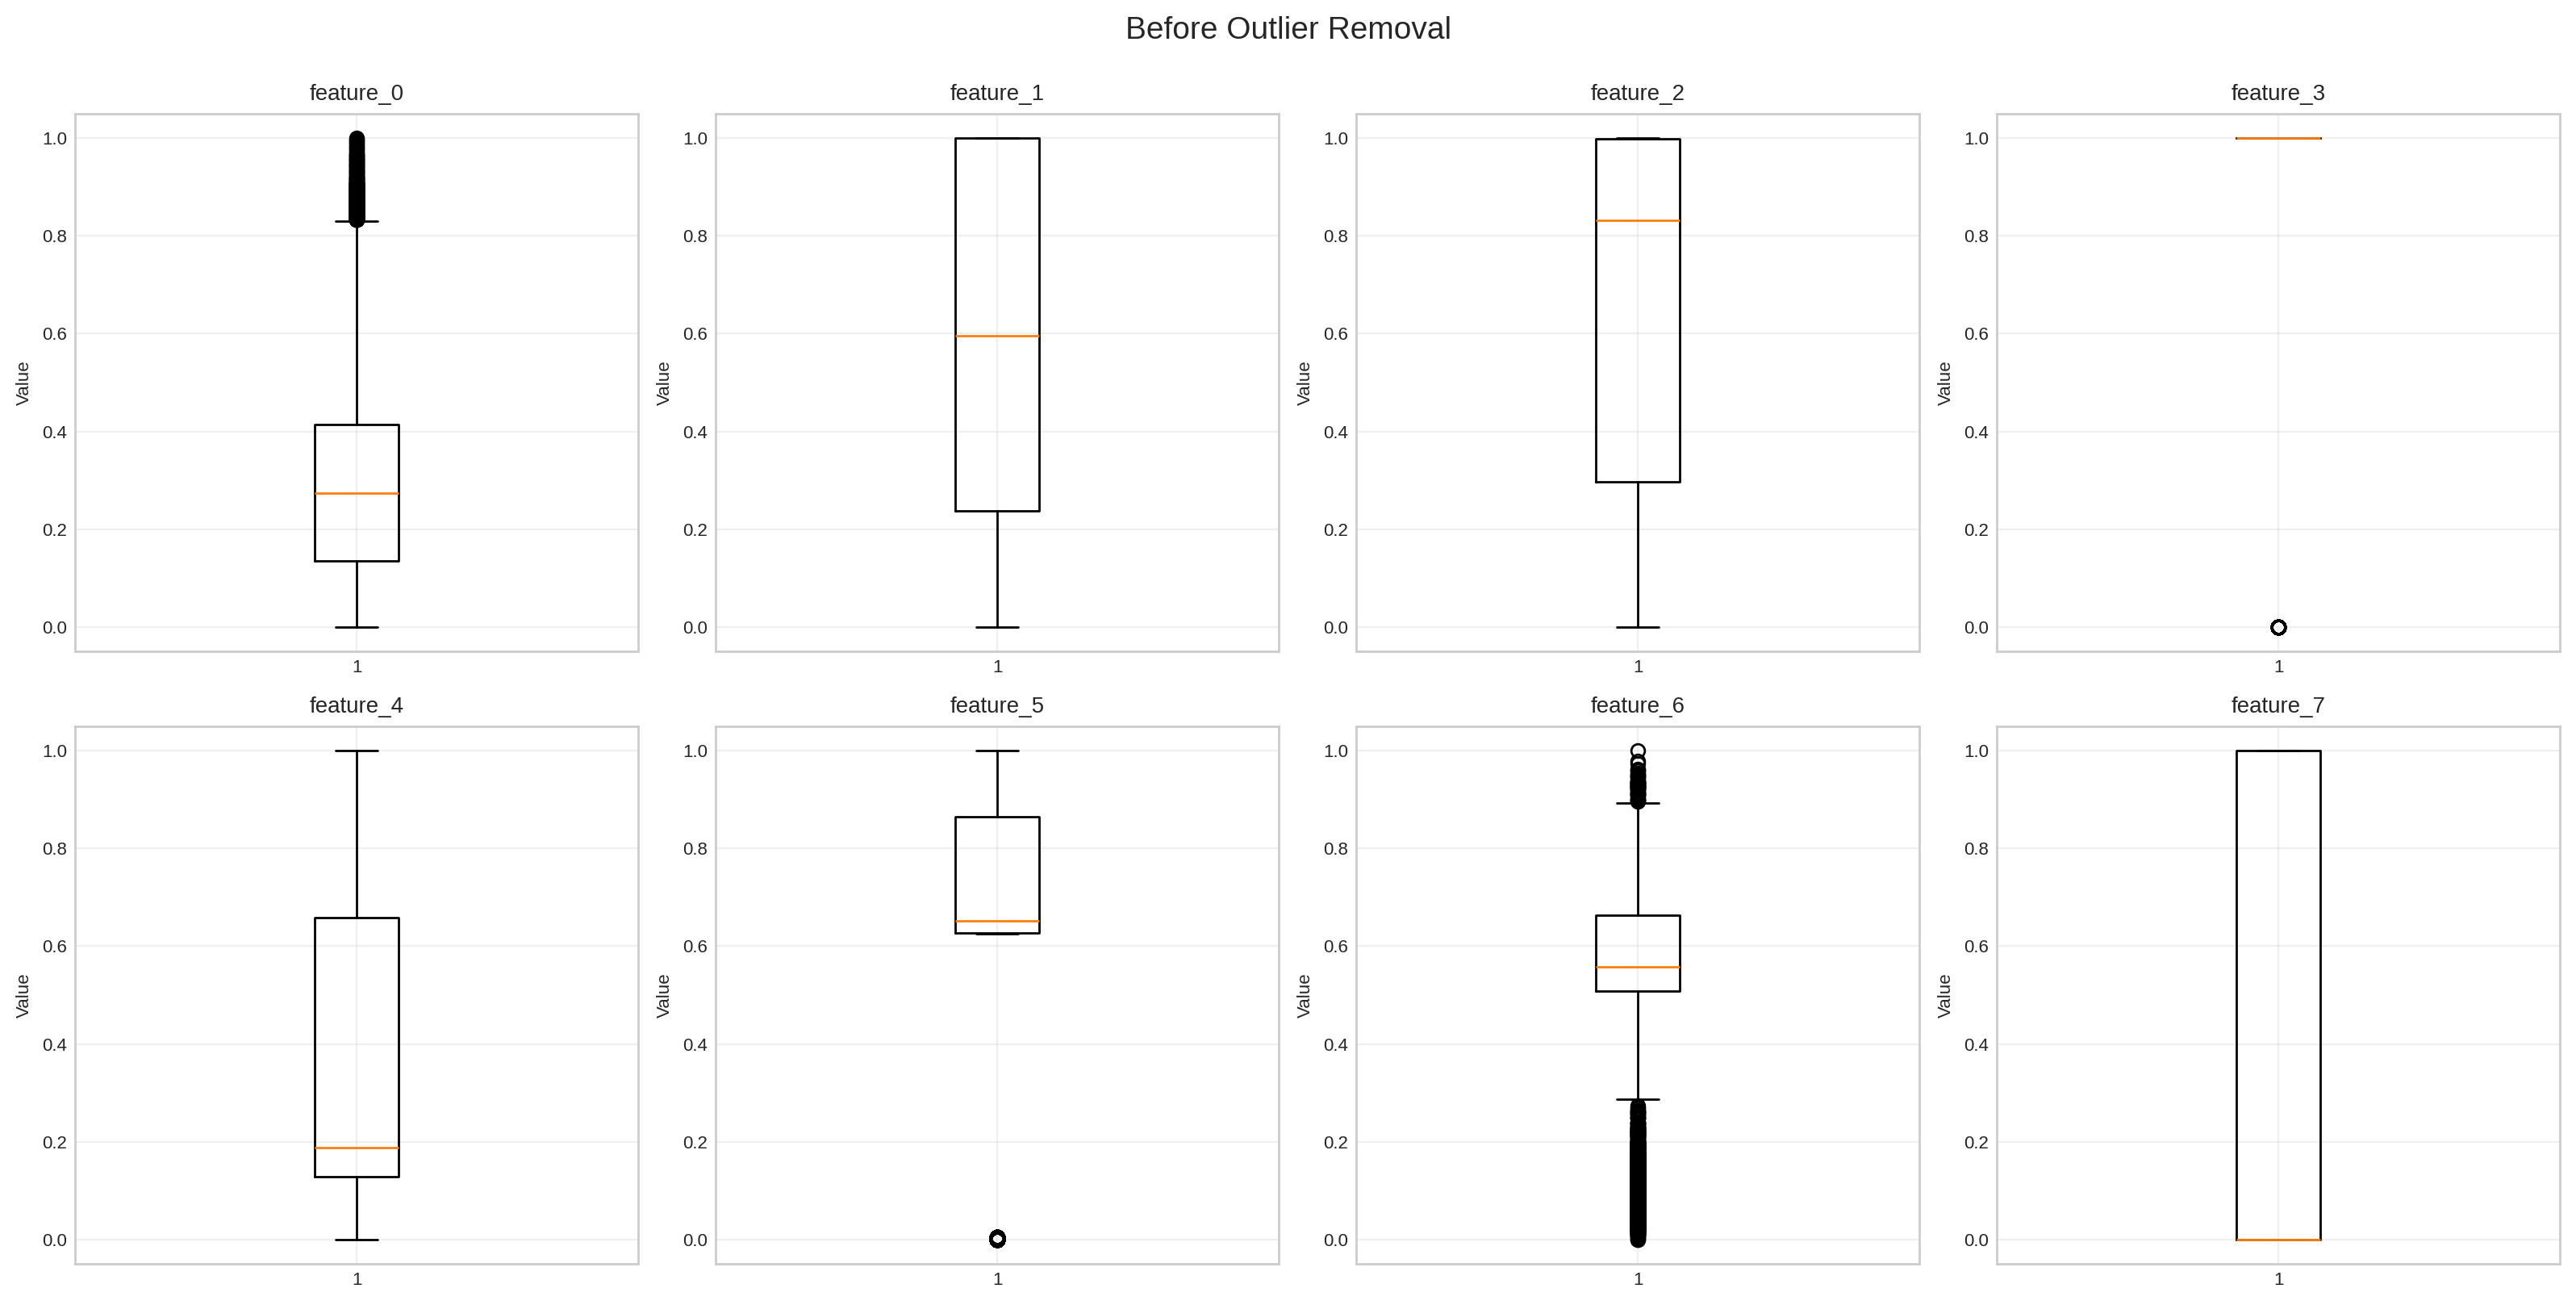


DETECTING OUTLIERS USING IQR METHOD

feature_0:
  Q1=0.14, Q3=0.41, IQR=0.28
  Bounds: [-0.28, 0.83]
  Outliers: 235

feature_1:
  Q1=0.24, Q3=1.00, IQR=0.76
  Bounds: [-0.90, 2.14]
  Outliers: 0

feature_2:
  Q1=0.30, Q3=1.00, IQR=0.70
  Bounds: [-0.75, 2.05]
  Outliers: 0

feature_3:
  Q1=1.00, Q3=1.00, IQR=0.00
  Bounds: [1.00, 1.00]
  Outliers: 8002

feature_4:
  Q1=0.13, Q3=0.66, IQR=0.53
  Bounds: [-0.67, 1.45]
  Outliers: 0

feature_5:
  Q1=0.63, Q3=0.86, IQR=0.24
  Bounds: [0.27, 1.22]
  Outliers: 8002

feature_6:
  Q1=0.51, Q3=0.66, IQR=0.15
  Bounds: [0.28, 0.90]
  Outliers: 8049

feature_7:
  Q1=0.00, Q3=1.00, IQR=1.00
  Bounds: [-1.50, 2.50]
  Outliers: 0

OUTLIER REMOVAL SUMMARY
Total rows in original data: 53759
Outliers detected and removed: 8244
Clean data rows: 45515
Percentage of data retained: 84.66%

VISUALIZING DATA AFTER OUTLIER REMOVAL


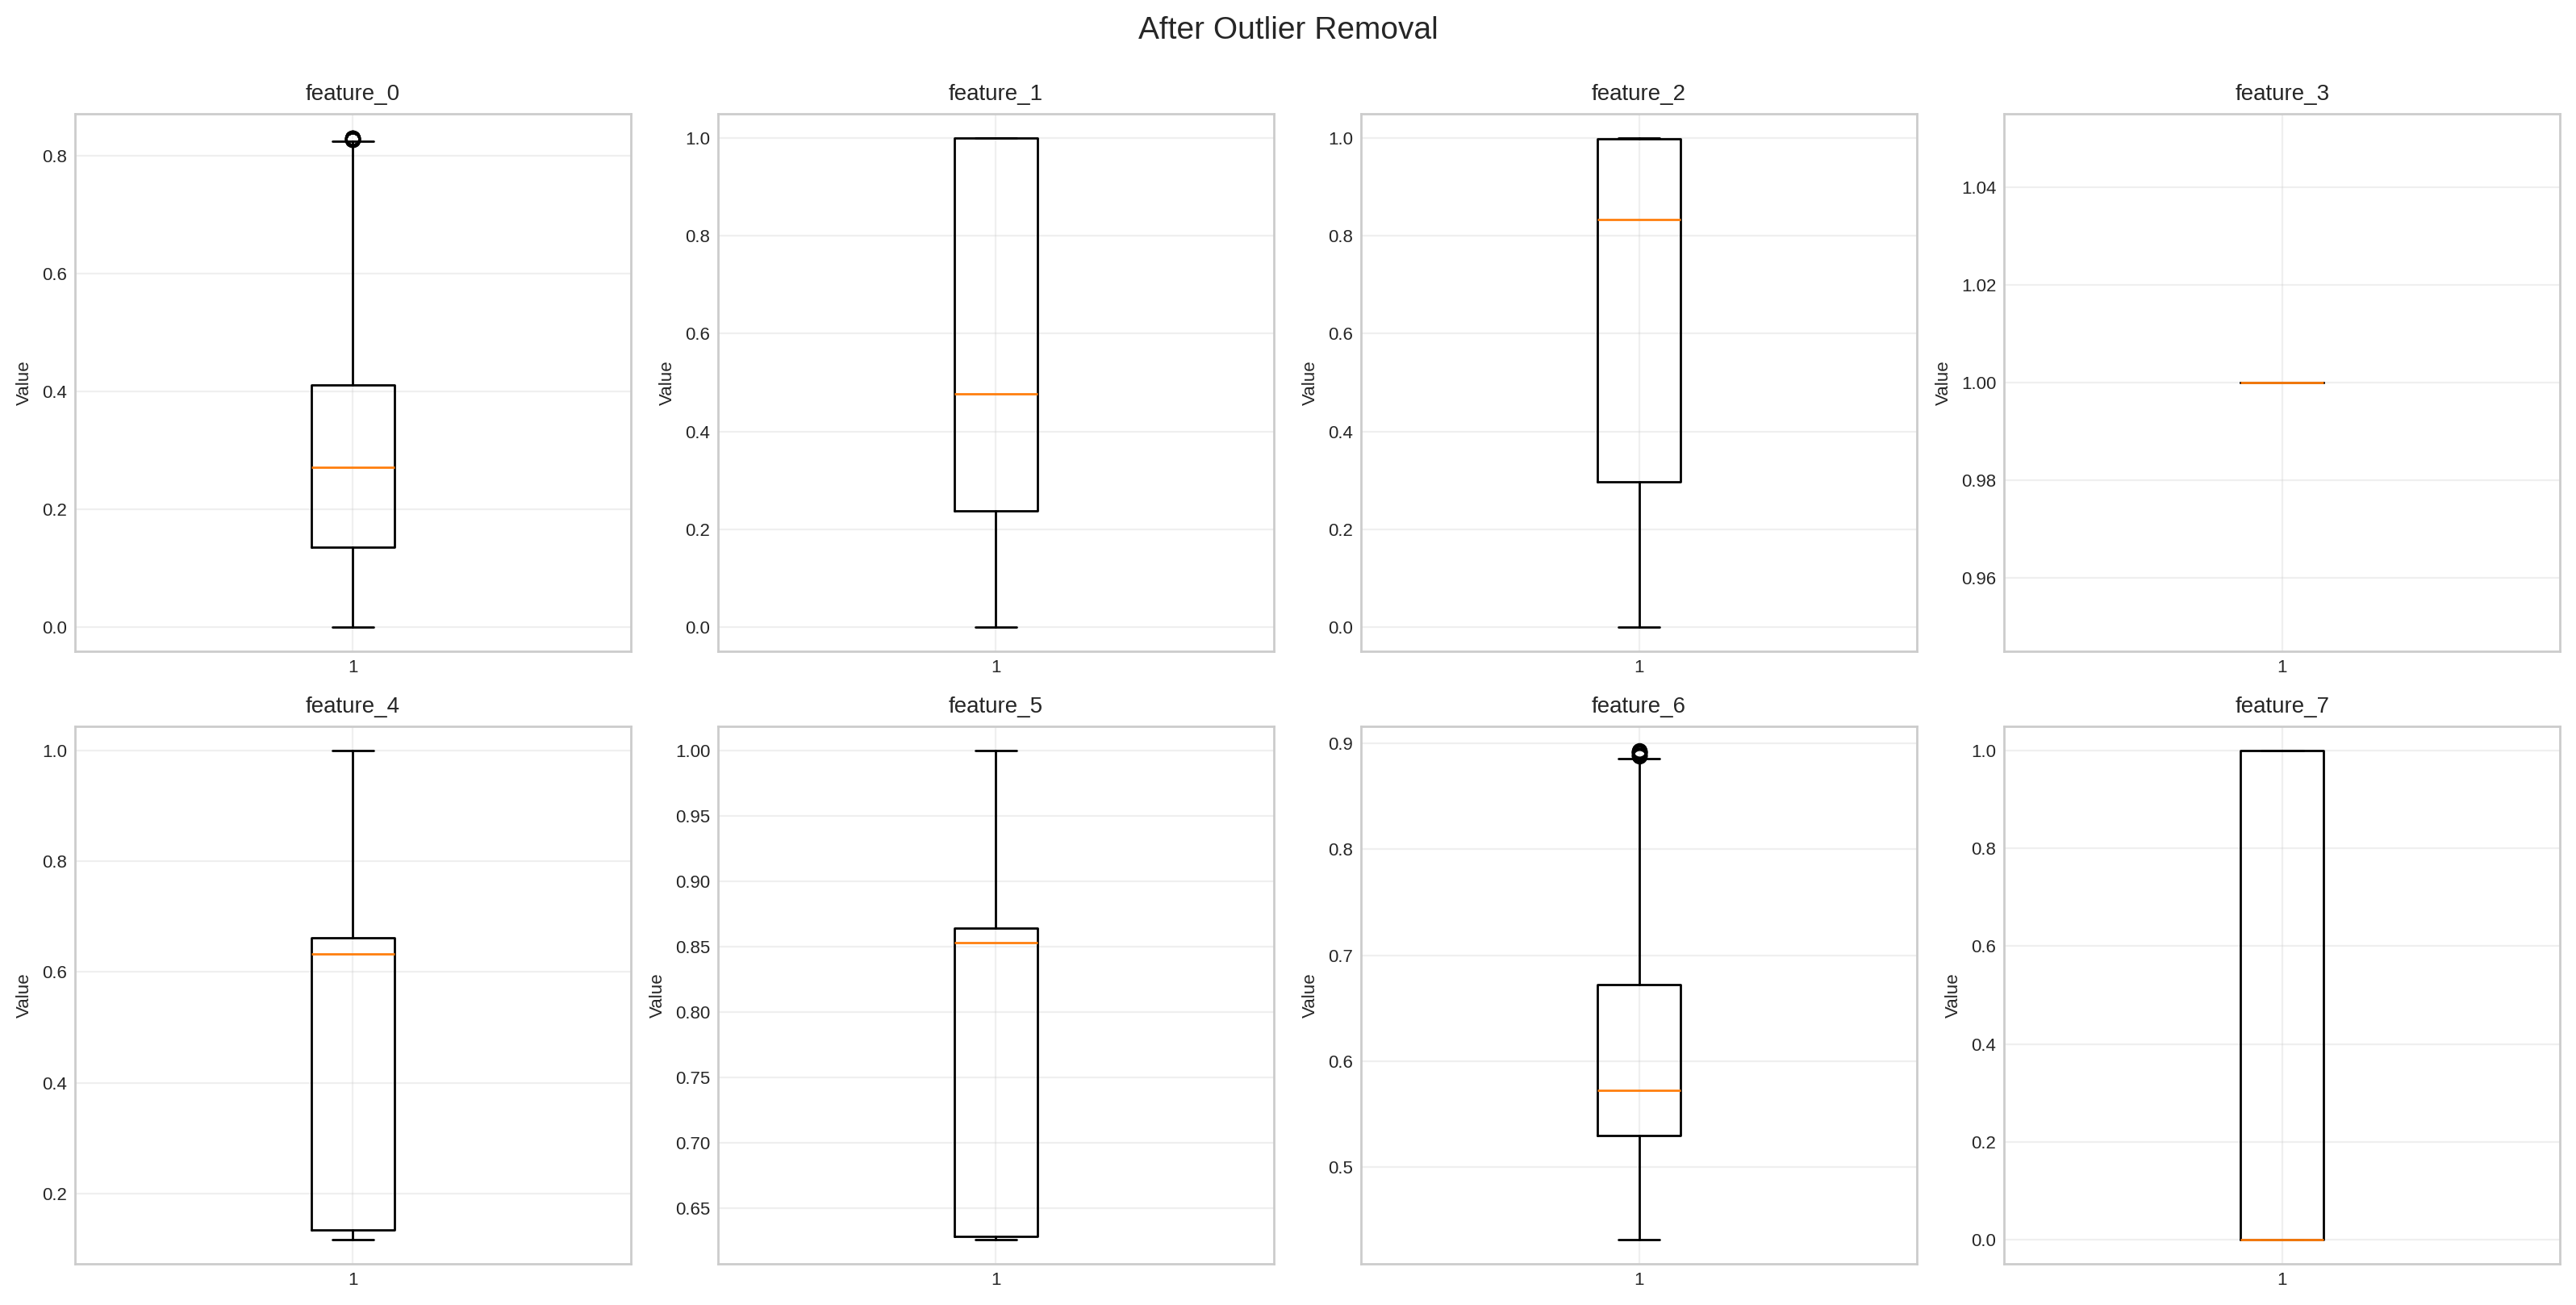


STATISTICS COMPARISON

Column               Metric     Original     Clean        Change    
----------------------------------------------------------------------
feature_0            Mean       0.29         0.28             -1.14%
                     Std        0.18         0.18             -2.18%
                     Min        0.00         0.00        
                     Max        1.00         0.83        

feature_1            Mean       0.57         0.57             -0.66%
                     Std        0.35         0.38             +8.31%
                     Min        0.00         0.00        
                     Max        1.00         1.00        

feature_2            Mean       0.68         0.67             -1.41%
                     Std        0.37         0.40             +8.10%
                     Min        0.00         0.00        
                     Max        1.00         1.00        

feature_3            Mean       0.85         1.00            +17.49%
  

In [ ]:
# STEP 1: Remove outliers from your training data
# Choose method: 'iqr' (recommended), 'zscore', or 'isolation'

X_train_clean, y_train_clean = remove_outliers_numpy(
    X_train=X_train,
    y_train=y_train,
    method='iqr',  # Options: 'iqr', 'zscore', 'isolation'
    column_names=None  # Provide your actual column names if you have them
)

# STEP 2: Now use the clean data for model training
# Your X_train_clean and y_train_clean are ready!

# Example:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train_clean, y_train_clean)
# predictions = model.predict(X_test)

In [ ]:
X_train_clean.shape

(45515, 8)

In [ ]:
y_train_clean.shape

(45515,)

# Training after outlier detection

# KNN

In [ ]:
%%time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'n_neighbors': randint(1, 31),              # Random integers between 1 and 30
    'weights': ['uniform', 'distance'],         # Weight function
    'p': [1, 2],                                # 1 = Manhattan, 2 = Euclidean
    'leaf_size': randint(20, 50),               # Leaf size for tree algorithms
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute neighbors
}

# Create base model
knn = KNeighborsRegressor()

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    knn,
    param_distributions=param_distributions,
    n_iter=20,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['kNN'] = [
    model.score(X_test, y_test),
    np.sqrt(mean_squared_error(y_test, y_predictions)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

# Use model.score for R-squared
print('\nR-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)))
# Use np.sqrt() for RMSE
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions))))

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters: {'algorithm': 'brute', 'leaf_size': 34, 'n_neighbors': 28, 'p': 1, 'weights': 'distance'}
Best CV score: 0.6850

R-squared error: 56.17%
Root Mean Squared Error: 35.60
CPU times: user 1.24 s, sys: 140 ms, total: 1.38 s
Wall time: 1min 42s


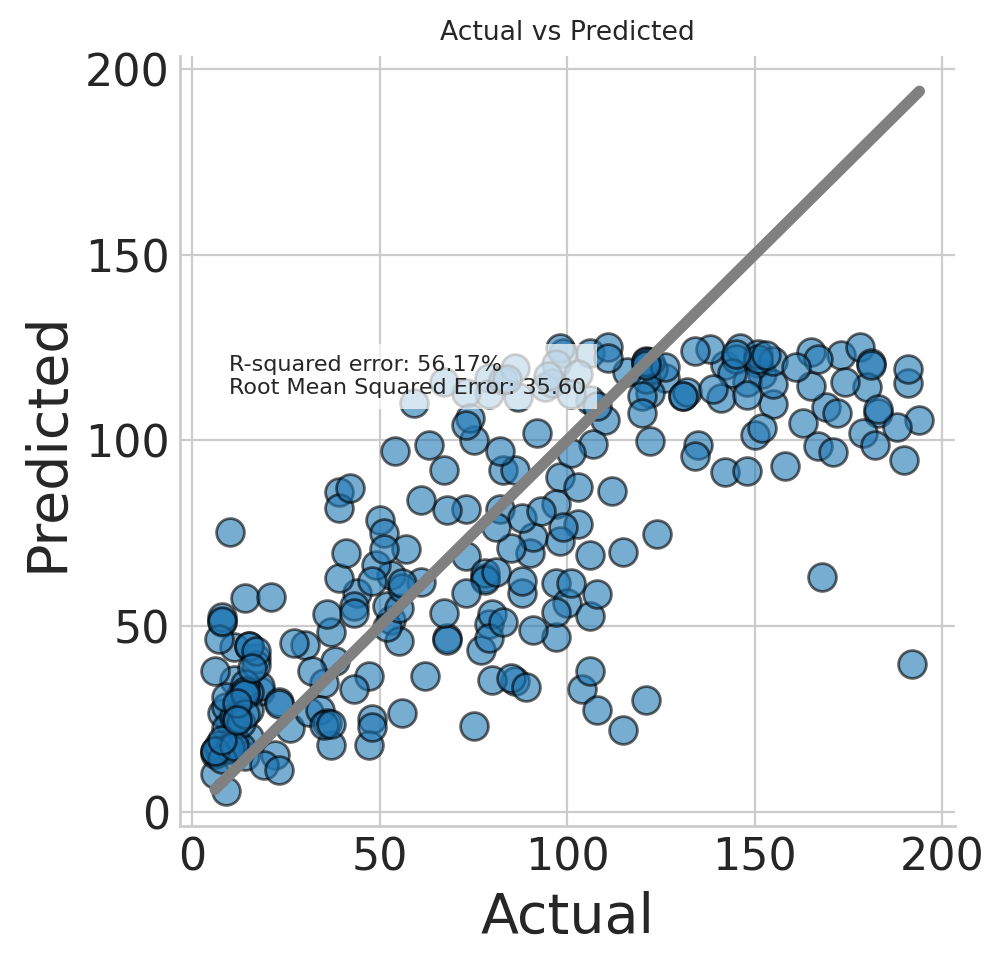

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

fig, ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

g = sns.scatterplot(
    x=y_test,
    y=y_predictions,
    s=100,
    alpha=0.6,
    linewidth=1,
    edgecolor='black',
    ax=ax
)

sns.lineplot(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    linewidth=4,
    color='gray',
    ax=ax
)

rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
x_pos = 0.05 * max(y_test)
y_pos = 0.9 * max(y_predictions)

plt.annotate(
    text=(
        'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
        'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
    ),
    xy=(x_pos, y_pos),
    size='medium',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()
plt.show()


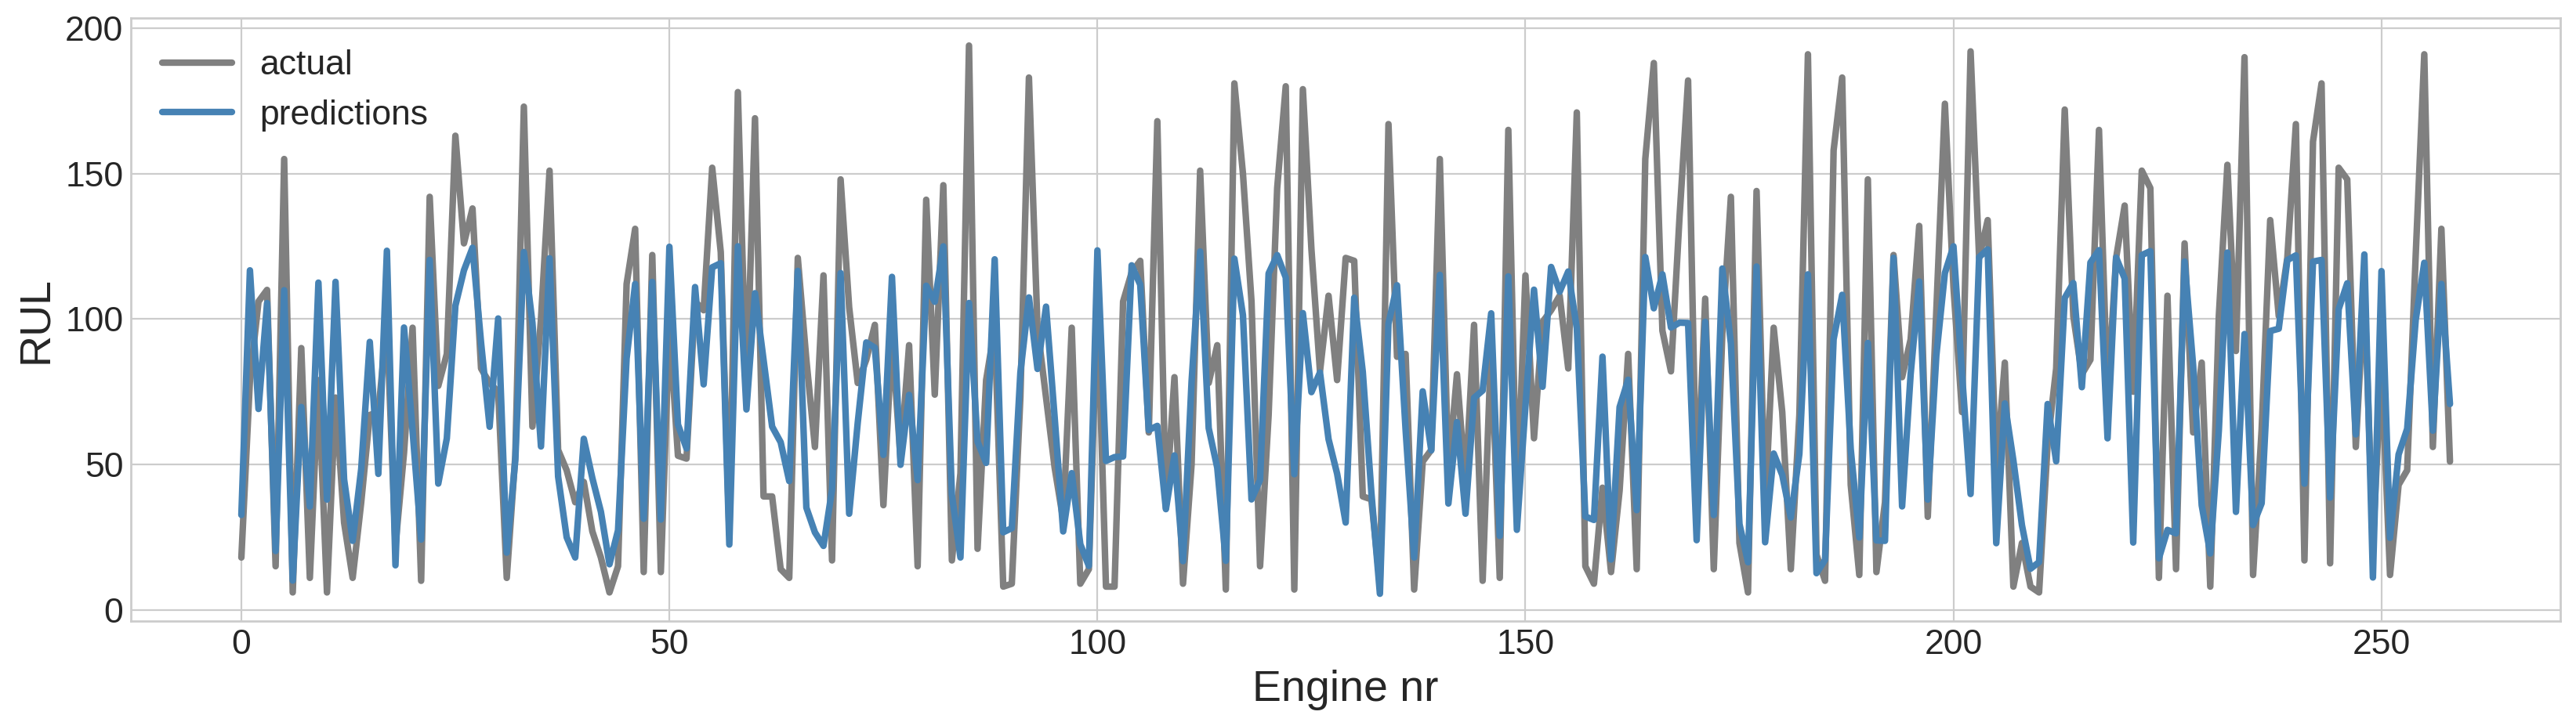

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

# SVR

In [ ]:
%%time
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'C': loguniform(1, 1000),           # Log-uniform between 1 and 1000
    'gamma': loguniform(0.001, 1),      # Log-uniform between 0.001 and 1
    'epsilon': uniform(0.001, 0.1)      # Uniform between 0.001 and 0.101
}

# Create base model
svr = SVR(kernel="rbf")

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    svr,
    param_distributions=param_distributions,
    n_iter=20,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['SVM'] = [
    model.score(X_test, y_test),
    np.sqrt(mean_squared_error(y_test, y_predictions)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

print('\nR-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)))
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions))))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

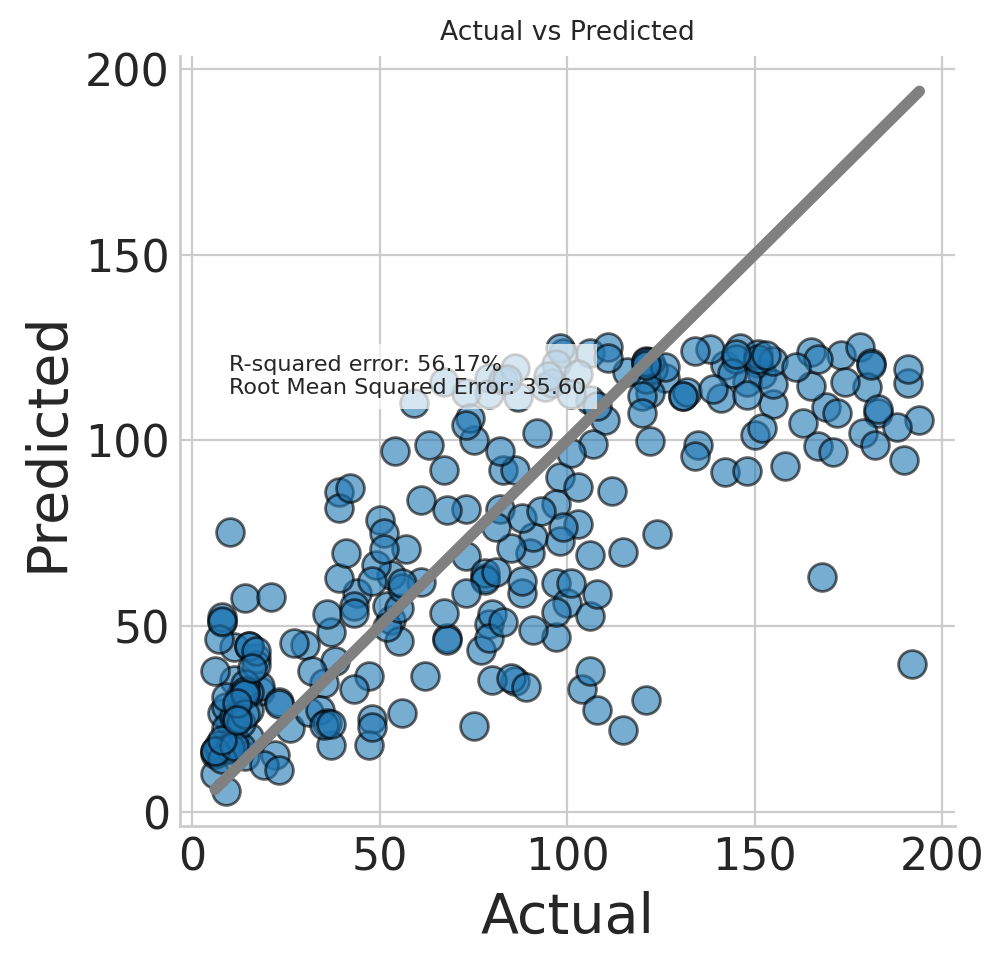

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
x_pos = 0.05 * max(y_test)
y_pos = 0.9 * max(y_predictions)

plt.annotate(
    text=(
        'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
        'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
    ),
    xy=(x_pos, y_pos),
    size='medium',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

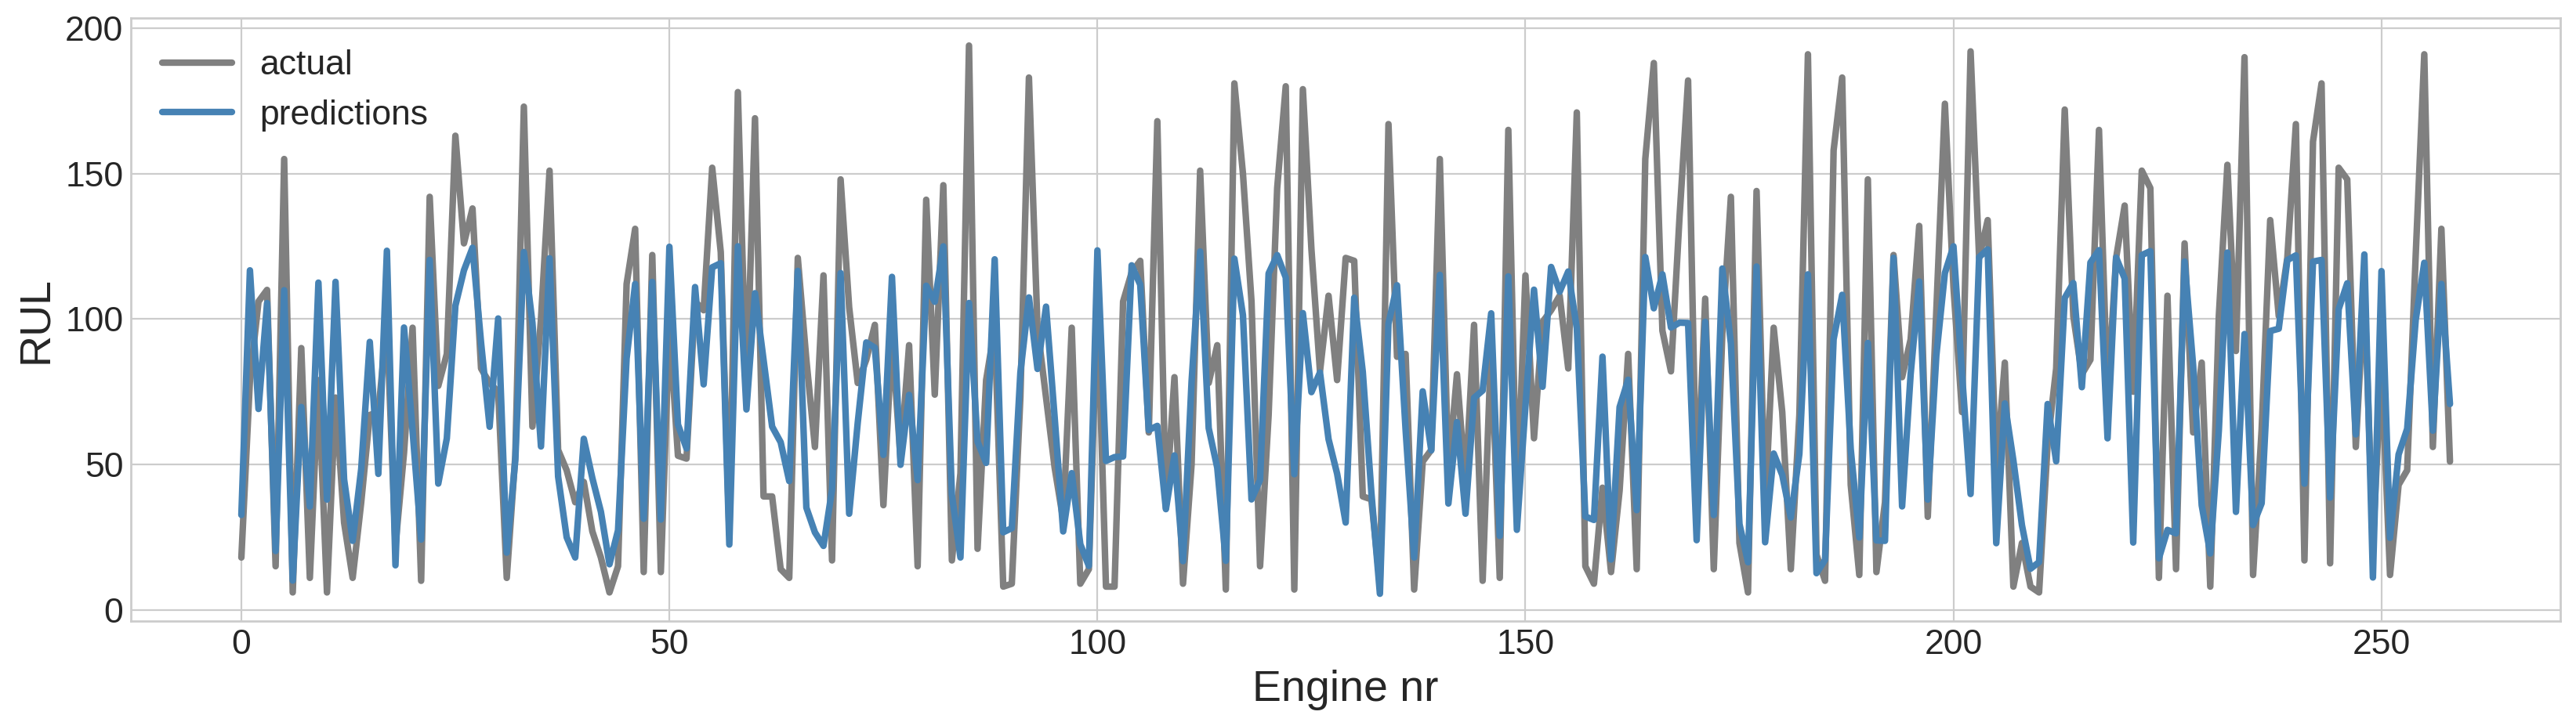

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

# Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'n_estimators': randint(100, 600),              # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],        # Maximum depth of trees
    'min_samples_split': randint(2, 20),            # Minimum samples to split
    'min_samples_leaf': randint(1, 10),             # Minimum samples at leaf
    'max_features': ['sqrt', 'log2', None],         # Number of features to consider
    'bootstrap': [True, False],                     # Bootstrap samples
    'max_samples': uniform(0.7, 0.3)                # Fraction of samples (0.7 to 1.0)
}

# Create base model
rf = RandomForestRegressor(n_jobs=-1, random_state=42)

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_distributions,
    n_iter=25,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['Random Forest'] = [
    model.score(X_test, y_test),
    np.sqrt(mean_squared_error(y_test, y_predictions)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

print('\nR-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)))
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions))))

Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best parameters: {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'max_samples': np.float64(0.7316482779490812), 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 227}
Best CV score: 0.7608

R-squared error: 59.69%
Root Mean Squared Error: 34.14
CPU times: user 23.2 s, sys: 628 ms, total: 23.8 s
Wall time: 11min 30s


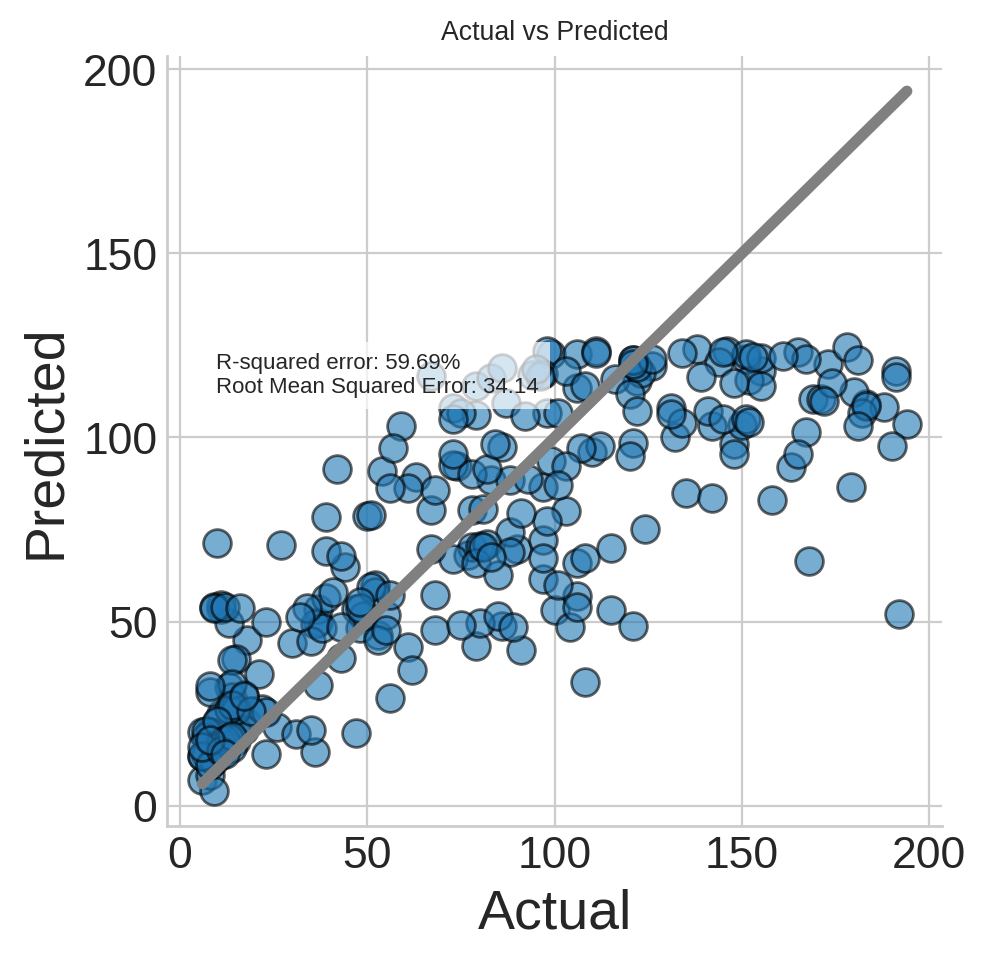

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=5,5

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
x_pos = 0.05 * max(y_test)
y_pos = 0.9 * max(y_predictions)

plt.annotate(
    text=(
        'R-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)) + '\n' +
        'Root Mean Squared Error: ' + "{:.2f}".format(rmse)
    ),
    xy=(x_pos, y_pos),
    size='medium',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # optional for readability
)

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

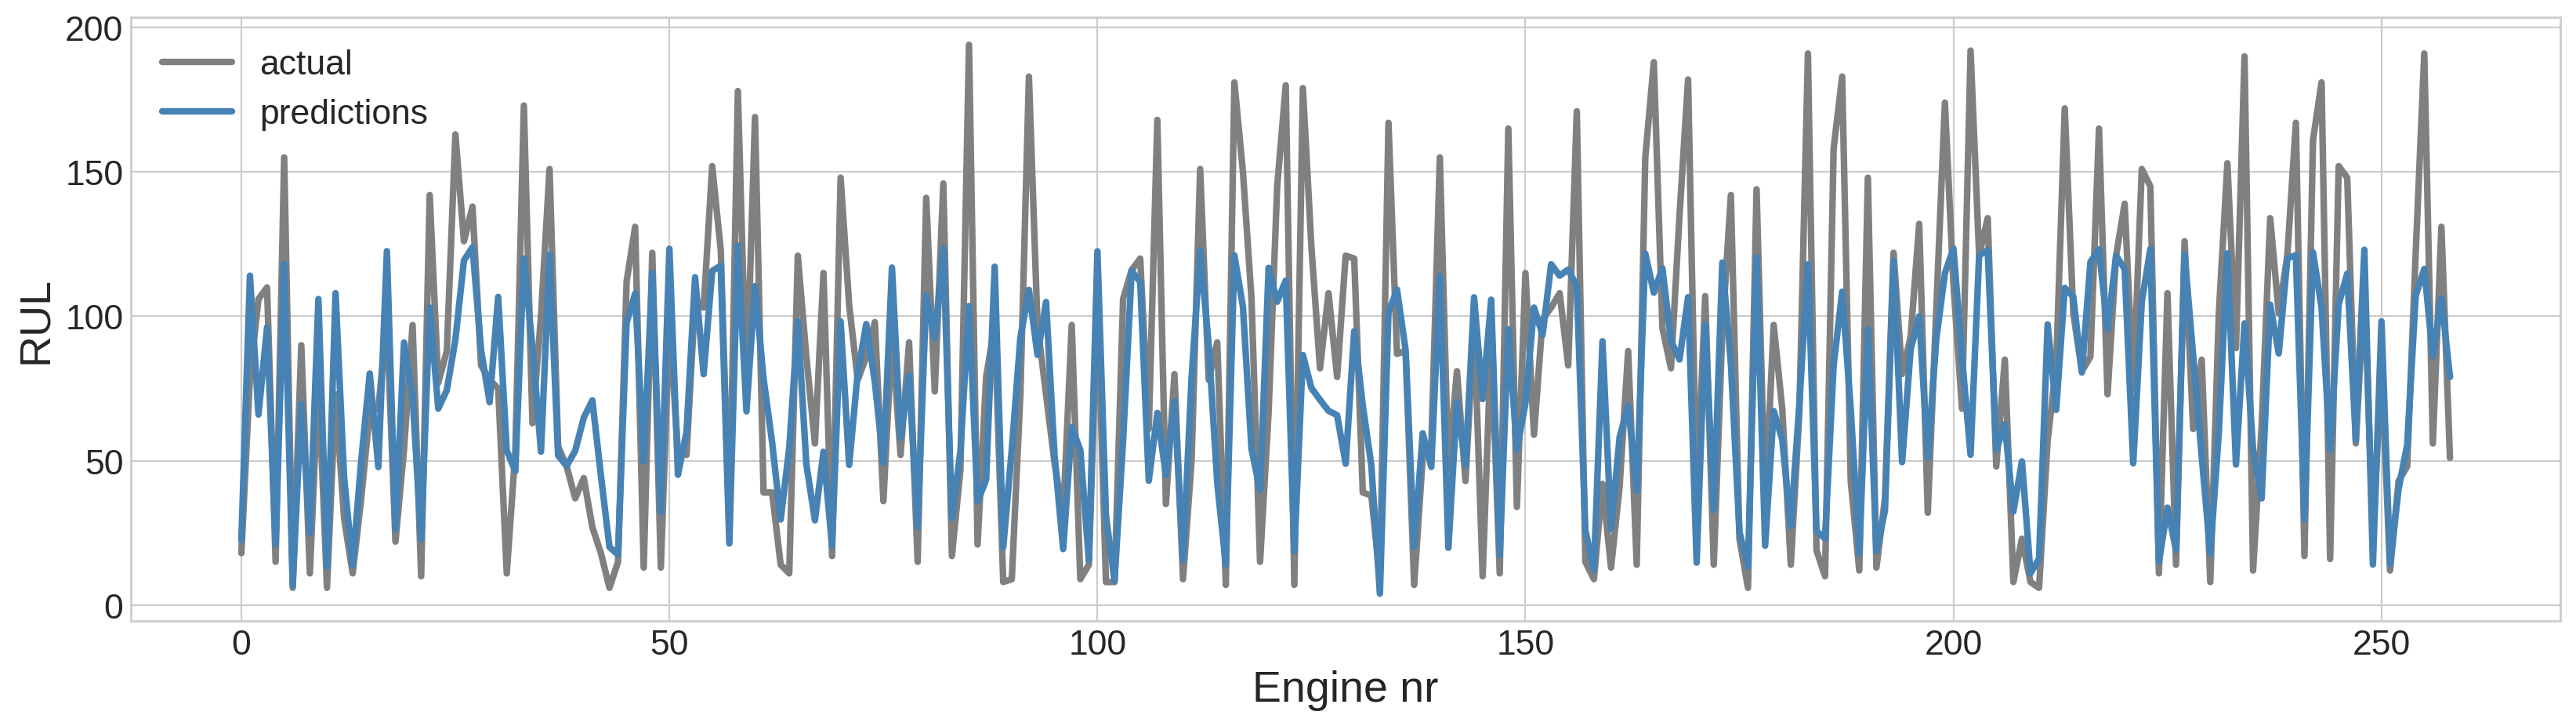

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=20,5

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(df_test['engine'].unique())),
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

# ADABoost

In [ ]:
%%time
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'n_estimators': randint(50, 500),                    # Number of boosting stages
    'learning_rate': uniform(0.01, 1.99),                # Learning rate (0.01 to 2.0)
    'loss': ['linear', 'square', 'exponential'],         # Loss function
    'estimator__max_depth': randint(1, 10),         # Max depth of base estimator
    'estimator__min_samples_split': randint(2, 20), # Min samples to split
    'estimator__min_samples_leaf': randint(1, 10)   # Min samples at leaf
}

# Create base model with decision tree estimator
base_estimator = DecisionTreeRegressor(random_state=42)
adaboost = AdaBoostRegressor(estimator=base_estimator, random_state=42)

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    adaboost,
    param_distributions=param_distributions,
    n_iter=20,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['AdaBoost'] = [
    sklearn.metrics.r2_score(y_test, y_predictions),
    np.sqrt(mean_squared_error(y_test, y_predictions)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

print('\nR-squared error: ' + "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions)))
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions))))

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best parameters: {'estimator__max_depth': 9, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 11, 'learning_rate': np.float64(0.10286466979509469), 'loss': 'exponential', 'n_estimators': 239}
Best CV score: 0.7141

R-squared error: 54.13%
Root Mean Squared Error: 36.42
CPU times: user 51.1 s, sys: 1.01 s, total: 52.1 s
Wall time: 13min 1s


# XGBoost

In [ ]:
%%time
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

start = time.time()

# Define parameter distributions for random search
param_distributions = {
    'n_estimators': randint(100, 1000),              # Number of boosting rounds
    'max_depth': randint(3, 10),                     # Maximum tree depth
    'learning_rate': uniform(0.01, 0.29),            # Learning rate (0.01 to 0.3)
    'subsample': uniform(0.6, 0.4),                  # Subsample ratio (0.6 to 1.0)
    'colsample_bytree': uniform(0.6, 0.4),           # Feature sampling (0.6 to 1.0)
    'min_child_weight': randint(1, 10),              # Minimum sum of instance weight
    'gamma': uniform(0, 0.5),                        # Minimum loss reduction
    'reg_alpha': uniform(0, 1),                      # L1 regularization
    'reg_lambda': uniform(0, 1)                      # L2 regularization
}

# Create base model
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    tree_method='hist'  # Faster training
)

# RandomizedSearchCV - faster than GridSearchCV
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_distributions,
    n_iter=25,              # Number of parameter settings sampled
    cv=3,                   # 3-fold cross-validation (fast)
    scoring='r2',           # Optimize for R-squared
    n_jobs=-1,              # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train_clean, y_train_clean)

# Best model
model = random_search.best_estimator_
print(f"\nBest parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

end_train = time.time()

# Predictions
y_predictions = model.predict(X_test)
end_predict = time.time()

# Store performance
model_performance.loc['XGBoost'] = [
    model.score(X_test, y_test),
    np.sqrt(mean_squared_error(y_test, y_predictions)),
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

print('\nR-squared error: ' + "{:.2%}".format(model.score(X_test, y_test)))
print('Root Mean Squared Error: ' + "{:.2f}".format(np.sqrt(mean_squared_error(y_test, y_predictions))))

Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best parameters: {'colsample_bytree': np.float64(0.8430179407605753), 'gamma': np.float64(0.08526206184364576), 'learning_rate': np.float64(0.02886496196573106), 'max_depth': 6, 'min_child_weight': 9, 'n_estimators': 415, 'reg_alpha': np.float64(0.5632882178455393), 'reg_lambda': np.float64(0.3854165025399161), 'subsample': np.float64(0.6063865008880857)}
Best CV score: 0.7624

R-squared error: 55.05%
Root Mean Squared Error: 36.06
CPU times: user 4.36 s, sys: 47.7 ms, total: 4.41 s
Wall time: 2min 51s


In [ ]:
model_performance.style.background_gradient(cmap='RdYlBu_r').format({'R2': '{:.2%}',
                                                                     'RMSE': '{:.2f}',
                                                                     'time to train':'{:.3f}',
                                                                     'time to predict':'{:.3f}',
                                                                     'total time':'{:.3f}',
                                                                     })

# Best Model

Random Forest